# 🔵 Inputs

In [31]:
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np
import seaborn as sns
import subprocess
from sklearn.preprocessing import MinMaxScaler
from IPython.display import SVG
from scipy.optimize import curve_fit
import scipy.integrate as integrate

results = "results.csv"
cleaned_results = "cleaned_results.csv"


plt.rcParams['text.usetex'] = True
sns.set()

In [32]:
# Real Function
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

def plt_svg(svg_path):
    subprocess.run(["convert", svg_path + ".svg", svg_path + ".png"], shell=True)
    return plt.imread(svg_path + ".png")

def least_squares_fit(function, X, y, guess, method=None):
    params, covariance = curve_fit(function, X, y, guess, method=method, maxfev=1000000)
    return params

def least_squares(X, y_real, func, *params):
    if params:
        y_pred = func(X, *params)
    else:
        y_pred = func(X)
    return np.sum( (y_real - y_pred)**2)/len(y_real)

def least_squares_diff(X, y_real, func, *params):
    if params:
        y_pred = func(X, *params)
    else:
        y_pred = func(X)
    return np.sum( (np.gradient(y_real, X) - np.gradient(y_pred, X))**2)/len(np.gradient(y_real, X))

def fitness_diff_score(X, y_real, y_pred):
    return np.sum( (np.gradient(y_real, X) - np.gradient(y_pred, X))**2)/len(np.gradient(y_real, X))

## 🔷 O Problema
O fitness score é calculado como o erro médio quadrático.
- Nesse caso não temos erro

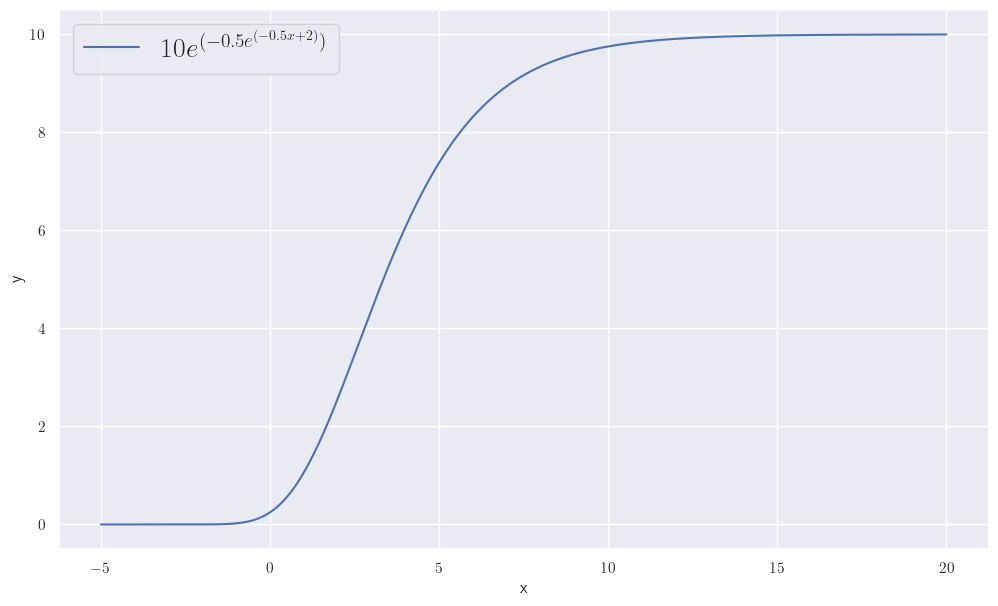

In [7]:
plt.figure(figsize=(12,7))
X = np.linspace(-5, 20, 1000)
y = func(X)
sns.lineplot(x=X, y=y, label="$10e^{(-0.5e^{(-0.5x+2)})}$")
plt.ylabel("y"); plt.xlabel("x")
plt.legend(fontsize=20)
plt.show()

# Adjusting Data

In [9]:
dirs = ["output", "output_const_range", "output_generations", "output_inten_scaled", "output_intensified", "output_scaled",
       "output_expr_size/test1", "output_expr_size/test2", "output_expr_size/test3", "output_diff_scaled", "output_differentiated"]

dirs = ["../algorithms/Outputs/"+i for i in dirs]

for d in dirs:
    data = pd.read_csv(d + "/" + results)
    colum = []
    for col in data.columns:
        colum.append(col.strip())
    data.columns = colum
    data.training_time = data.training_time/60
    data.to_csv(d + "/" + cleaned_results, index=False)

# 🔵 1. Output
Caso base. Equação
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- 🔴 X range: (0, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Not Normalized
- 🔴 Constants range from 0 to 1

In [91]:
path = "output/"

data = pd.read_csv(path + cleaned_results)

In [92]:
X = np.linspace(0, 15, 1000)
y = func(X)

## Fitness X Population Size

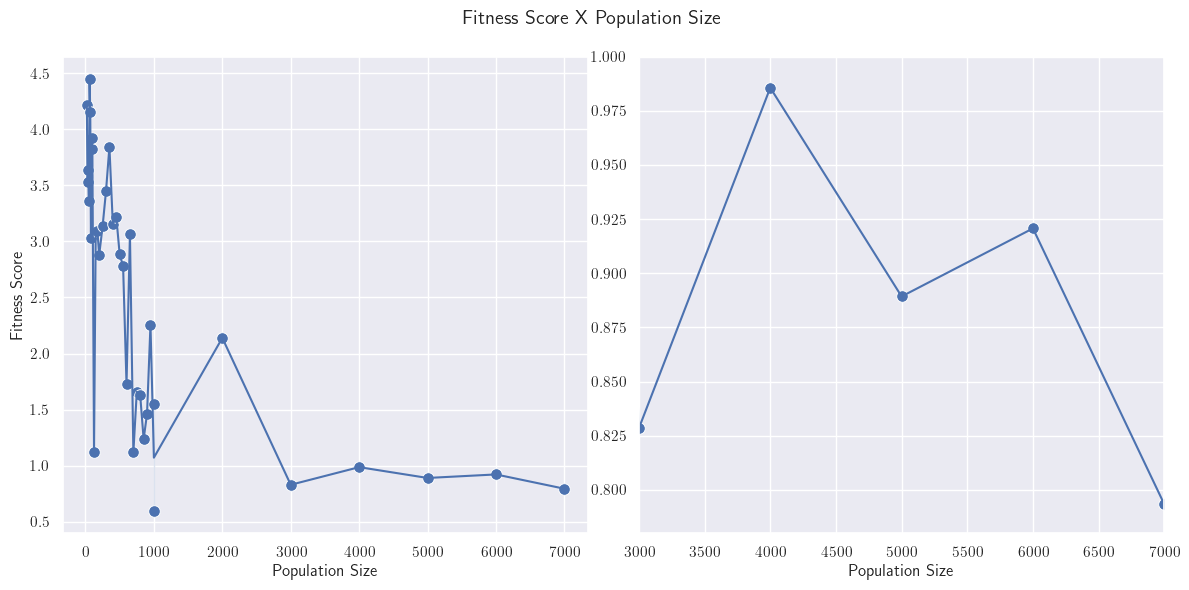

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Fitness Score X Population Size")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)
plt.tight_layout()

for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((3000, 7000))
axs[1].set_ylim((0.78, 1))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

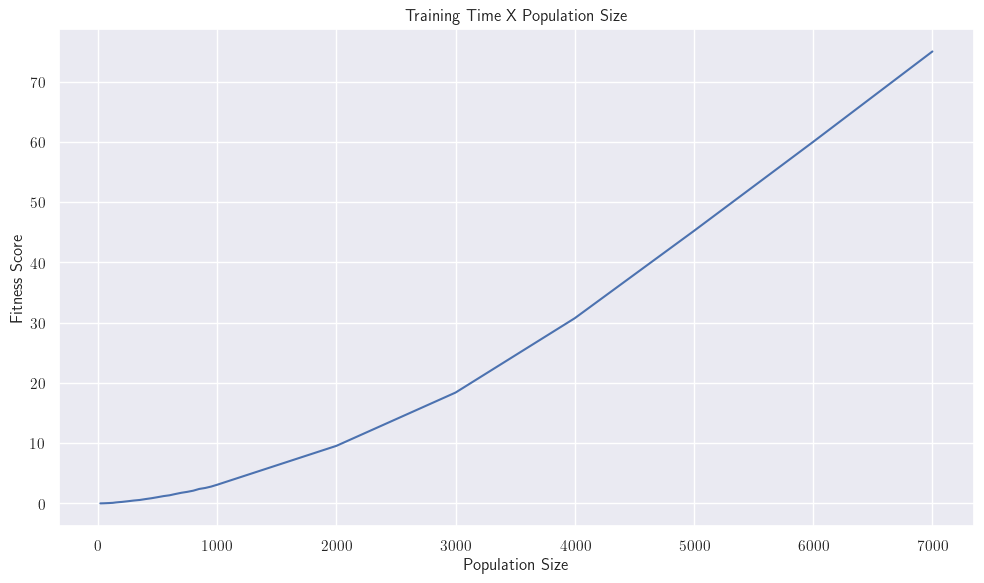

In [94]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Fitness Score")

plt.show()

## Best Fit

In [95]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")

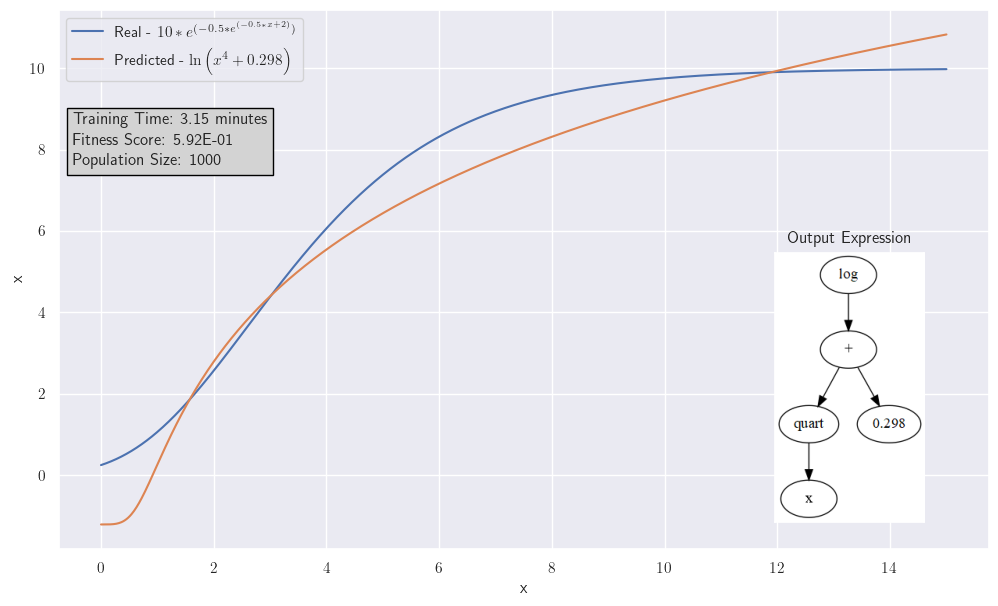

In [96]:
# fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

plt.figure(figsize=(12, 7))
plt.tight_layout()

sns.lineplot(x=best_data.x, y=func(best_data.x), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=best_data.x, y=best_data.y, label=r"Predicted - $\ln\Big(x^4 + 0.298\Big)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Fitness Score: {best_tree.fitness_score[0]:.2E}
Population Size: {best_index}""", 
            (-0.5, 7.6), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.6, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Output Expression")

plt.show()

## Lest Squares Fit

In [97]:
def model(X, a):
    return np.log(X**4 + a)

def model_over(X, a, b, c, d, e):
    return a*np.log((b*X + c)**4 + d) + e

params = least_squares_fit(model, X, y, [1])
params_over = least_squares_fit(model_over, X, y, [1, 1, 1, 1, 1])
print(f"params: {params}")
print(f"params over: {params_over}")

params: [1.57443367]
params over: [ 0.82158442  1.17057505 -0.80956622  0.27974877  1.67056586]


C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\3756440565.py:5: RuntimeWarning: invalid value encountered in log
  return a*np.log((b*X + c)**4 + d) + e


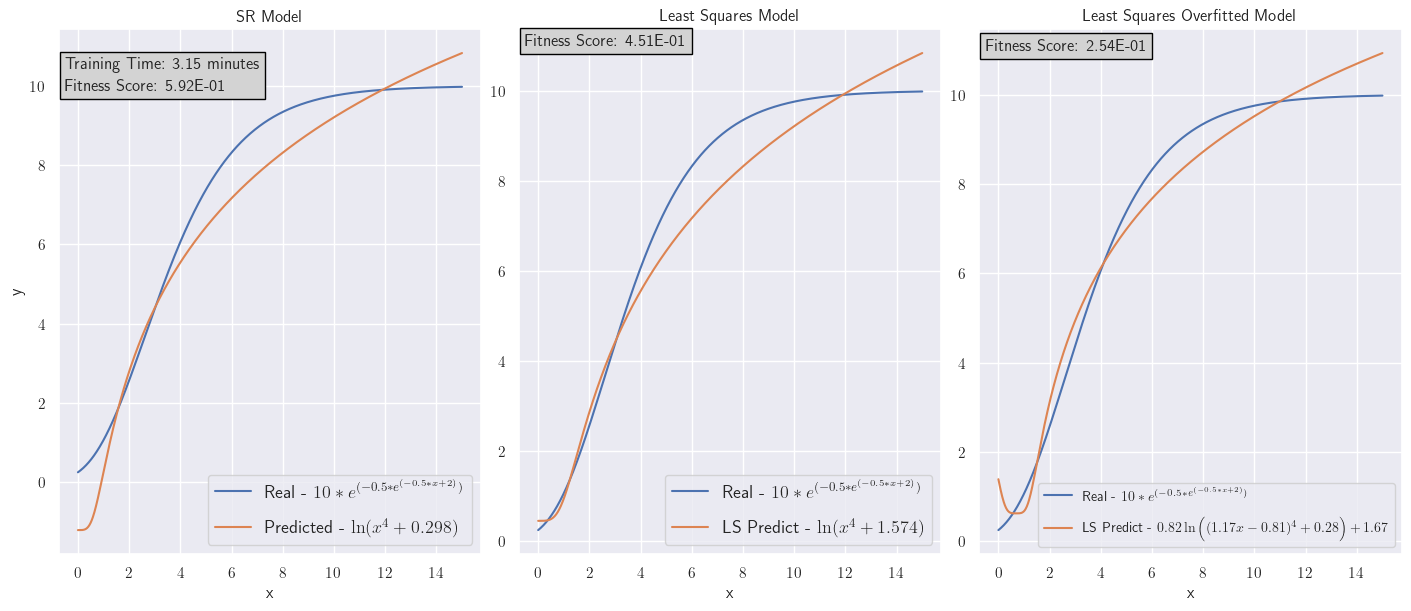

In [98]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(14, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=best_data.y, label=r"Predicted - $\ln(x^4 + 0.298)$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Fitness Score: {best_tree.fitness_score[0]:.2E}""", 
            (-0.5, 9.9), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5) 

axs[0].legend(prop={"size": 13}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $\ln(x^4 + 1.574)$")
axs[1].legend(prop={"size": 13}, labelspacing=1)
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 11), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[2])
sns.lineplot(x=X, y=model_over(X, *params_over), ax=axs[2], label=r"LS Predict - $0.82\ln\Big((1.17x - 0.81)^4 + 0.28\Big) + 1.67$")
axs[2].legend(prop={"size": 10}, labelspacing=1, loc="lower right")
axs[2].set_xlabel("x")

axs[2].annotate(f"""Fitness Score: {least_squares(X, y, model_over, *params_over):.2E}""", 
            (-0.5, 11), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[2].set_title("Least Squares Overfitted Model")


plt.show()

## 🔷 Derivative Test

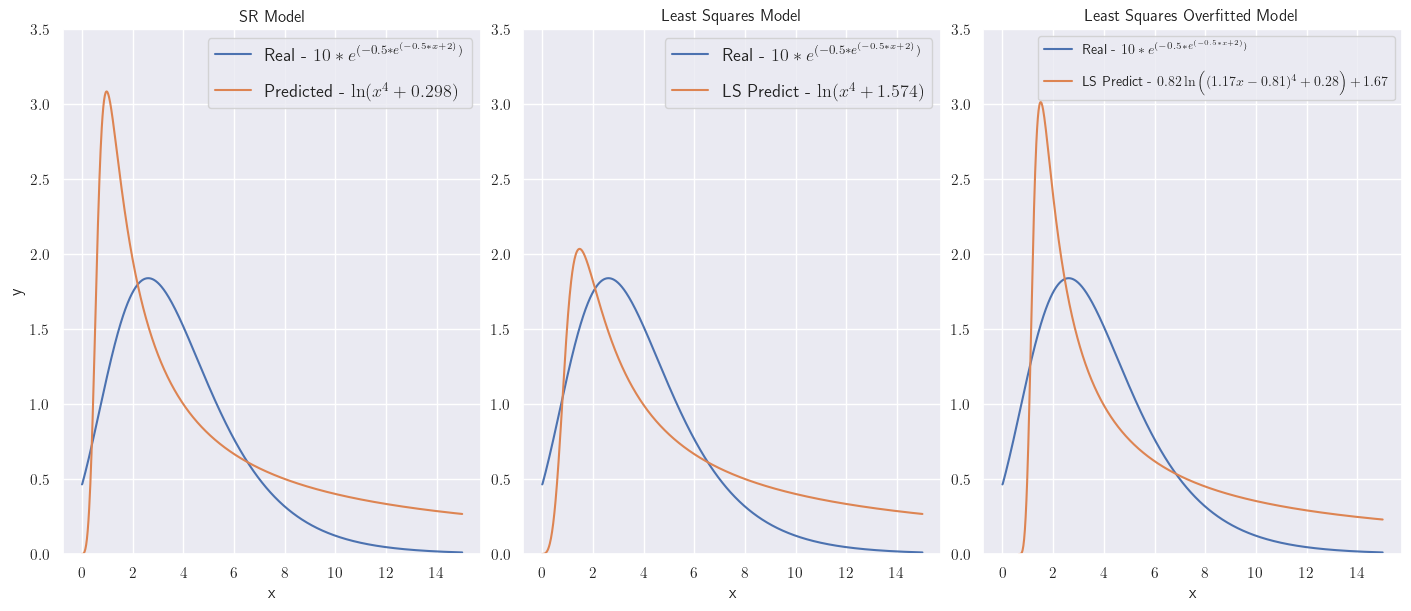

In [99]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(14, 6))
plt.setp(axs, ylim=(0, 3.5))

sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=np.gradient(best_data.y, X), label=r"Predicted - $\ln(x^4 + 0.298)$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Fitness Score: {fitness_diff_score(X, func(X), best_data.y)}""", 
            (-0.5, 9.9), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5) 

axs[0].legend(prop={"size": 13}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=np.gradient(model(X, *params), X), ax=axs[1], label=r"LS Predict - $\ln(x^4 + 1.574)$")
axs[1].legend(prop={"size": 13}, labelspacing=1)
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares_diff(X, y, model, *params):.2E}""", 
            (-0.5, 11), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[2])
sns.lineplot(x=X, y=np.gradient(model_over(X, *params_over), X), ax=axs[2], label=r"LS Predict - $0.82\ln\Big((1.17x - 0.81)^4 + 0.28\Big) + 1.67$")
axs[2].legend(prop={"size": 10}, labelspacing=1, loc="upper right")
axs[2].set_xlabel("x")

axs[2].annotate(f"""Fitness Score: {least_squares_diff(X, y, model_over, *params_over):.2E}""", 
            (-0.5, 11), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[2].set_title("Least Squares Overfitted Model")


plt.show()

# 🔵 Output Scaled

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (0, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Normalized input (range from 0 to 1)
- Constants range from 0 to 1

## Reverse Transform
$$x' = \frac{x - \min(x)}{\max(x) - \min(x)} \hspace{20mm} y'(x') = \frac{y(x) - \min(y(x))}{\max(y(x)) - \min(y(x))}$$

$$x = \Big(\max(x) - \min(x)\Big)x' + \min(x) \hspace{20mm} y(x) = \Big(\max(y(x)) - \min(y(x))\Big)y'(x') + \min(y(x))$$

The reverse transform outputed by the SR algorithm is
$$y(x) = \Big(\max(y(x)) - \min(y(x))\Big)y'\left(\frac{x - \min(x)}{\max(x) - \min(x)}\right) + \min(y(x))$$
Where:
- $y'$: Is the scaled function (outputed by the SR algorithm for a scaled input)

In [100]:
path = "output_scaled/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size
Diminuição **aparente** no valor do erro

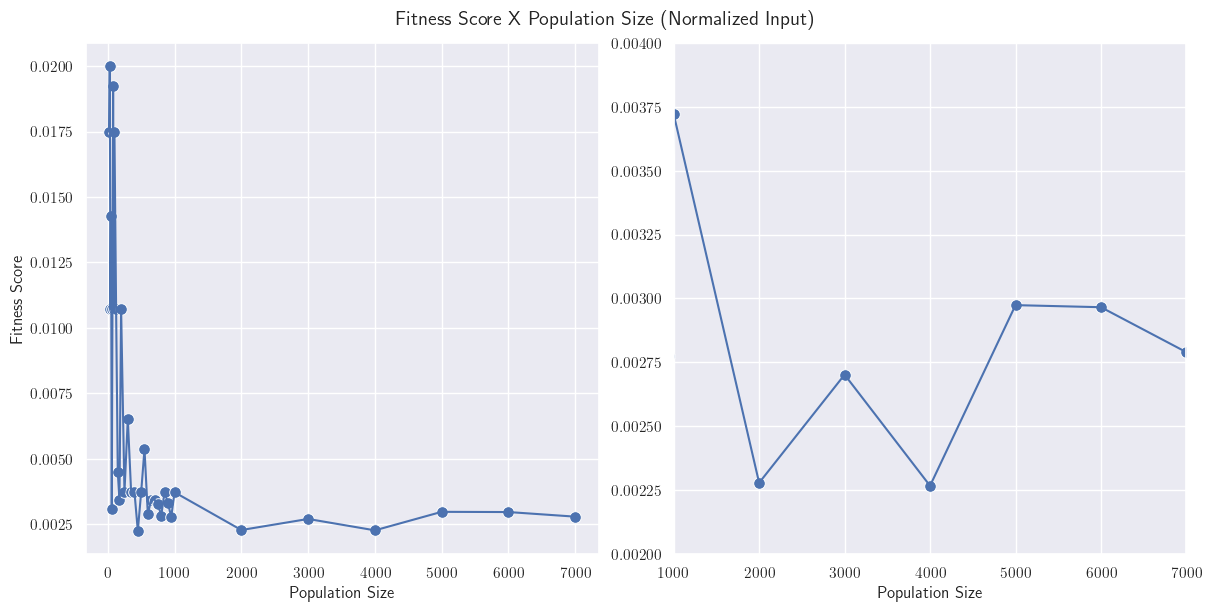

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Normalized Input)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((0.0020, 0.0040))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

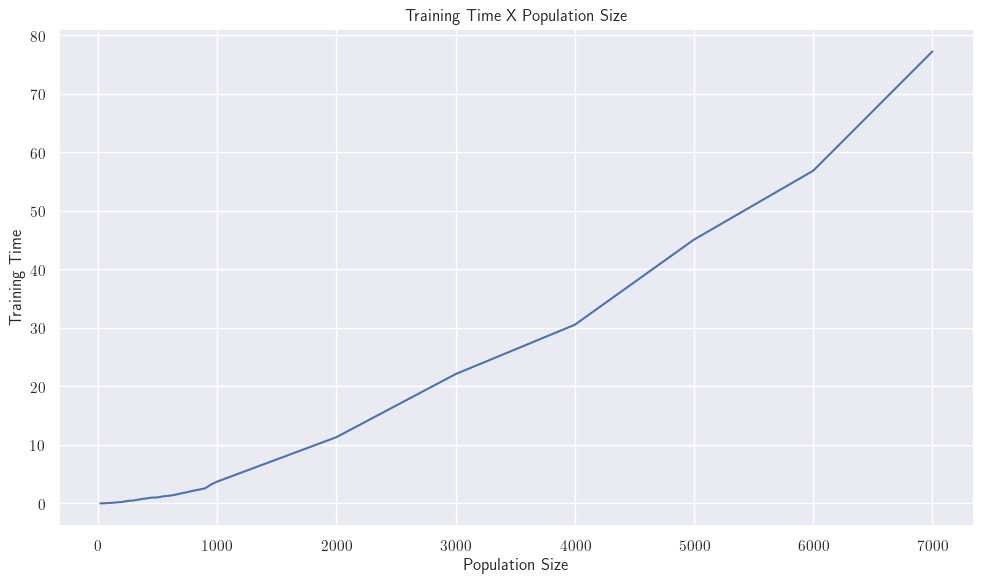

In [102]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit
Como os dados foram normalizados, o valor bruto do erro diminuí, simplesmentes pelos valores brutos serem menores. Concertamos esse erro para a escala real

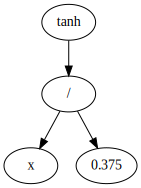

In [103]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
display(SVG(img_path + ".svg"))

In [104]:
X = np.linspace(0, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    return np.tanh((X - X.min())/(0.375 * X_range))*y_range + y.min()

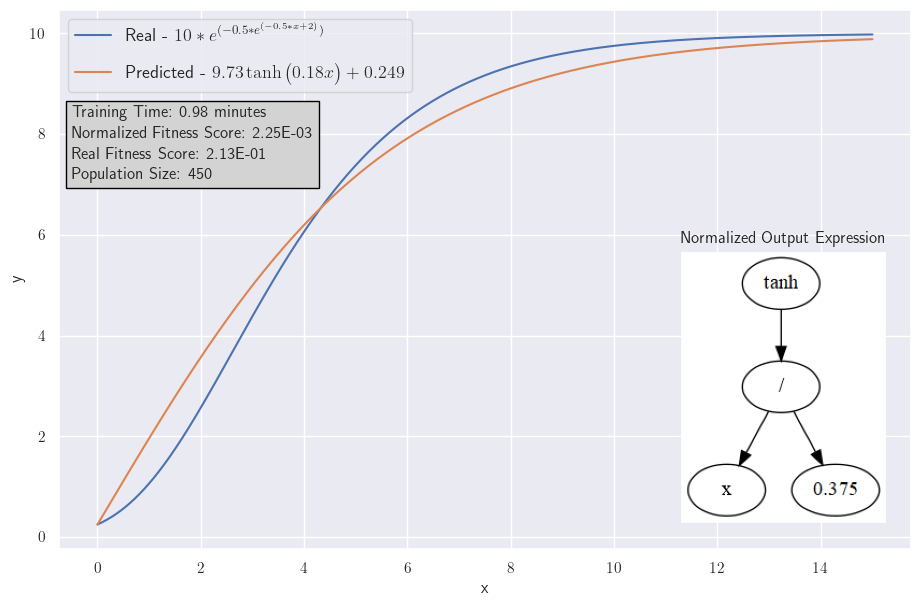

In [105]:
plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-0.5, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)


img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.6, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")

plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [106]:
def model(X, a):
    return 9.73*np.tanh(a*X) + 0.249

def model_norm(X, a, b, c):
    return a*np.tanh(b*X) + c

def model_over(X, a, b, c, d):
    return a * np.tanh(b*X + c) + d

params = least_squares_fit(model, X, y, [1])
params_norm = least_squares_fit(model_norm, X, y, [1, 1, 1])
params_over = least_squares_fit(model_over, X, y, [1, 1, 1, 1])
print(f"params: {params}")
print(f"params norm: {params_norm}")
print(f"params over: {params_over}")

params: [0.17790619]
params norm: [11.13080539  0.18402519 -0.86812024]
params over: [ 5.94633557  0.29071247 -0.81410775  4.00065131]


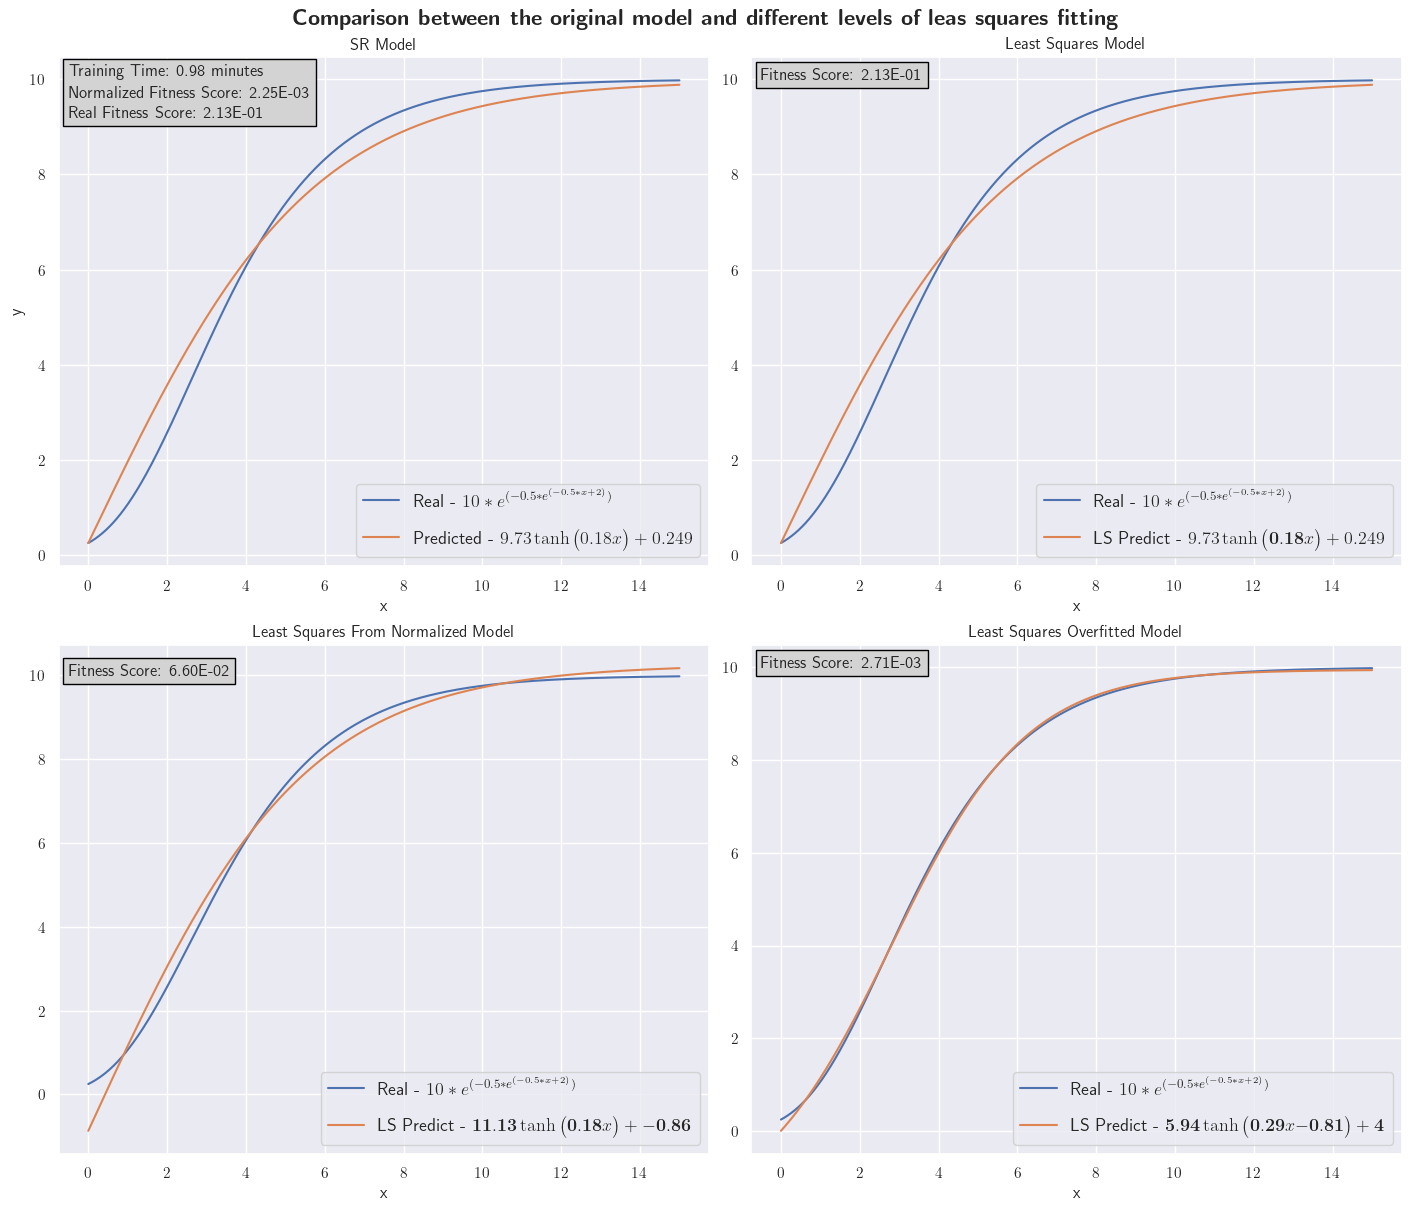

In [107]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(14, 12))

plt.suptitle(r"\textbf{Comparison between the original model and different levels of leas squares fitting}", fontsize=16)

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$", ax=axs[0, 0])


# Axis 1
axs[0, 0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0, 0].legend(prop={"size": 13}, labelspacing=1)
axs[0, 0].set_ylabel("y")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[0, 1], label=r"LS Predict - $9.73\tanh\Big(\mathbf{0.18}x\Big) + 0.249$")
axs[0, 1].legend(prop={"size": 13}, labelspacing=1)
axs[0, 1].set_xlabel("x")

axs[0, 1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[0, 1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 0])
sns.lineplot(x=X, y=model_norm(X, *params_norm), ax=axs[1, 0], label=r"LS Predict - $\mathbf{11.13}\tanh\Big(\mathbf{0.18}x\Big) + \mathbf{-0.86}$")
axs[1, 0].legend(prop={"size": 13}, labelspacing=1)
axs[1, 0].set_xlabel("x")

axs[1, 0].annotate(f"""Fitness Score: {least_squares(X, y, model_norm, *params_norm):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 0].set_title("Least Squares From Normalized Model")


# Axis 4
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 1])
sns.lineplot(x=X, y=model_over(X, *params_over), ax=axs[1, 1], label=r"LS Predict - $\mathbf{5.94}\tanh\Big(\mathbf{0.29}x \mathbf{- 0.81}\Big) + \mathbf{4}$")
axs[1, 1].legend(prop={"size": 13}, labelspacing=1)
axs[1, 1].set_xlabel("x")

axs[1, 1].annotate(f"""Fitness Score: {least_squares(X, y, model_over, *params_over):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 1].set_title("Least Squares Overfitted Model")



plt.show()

## 🔷 Teste da Derivada

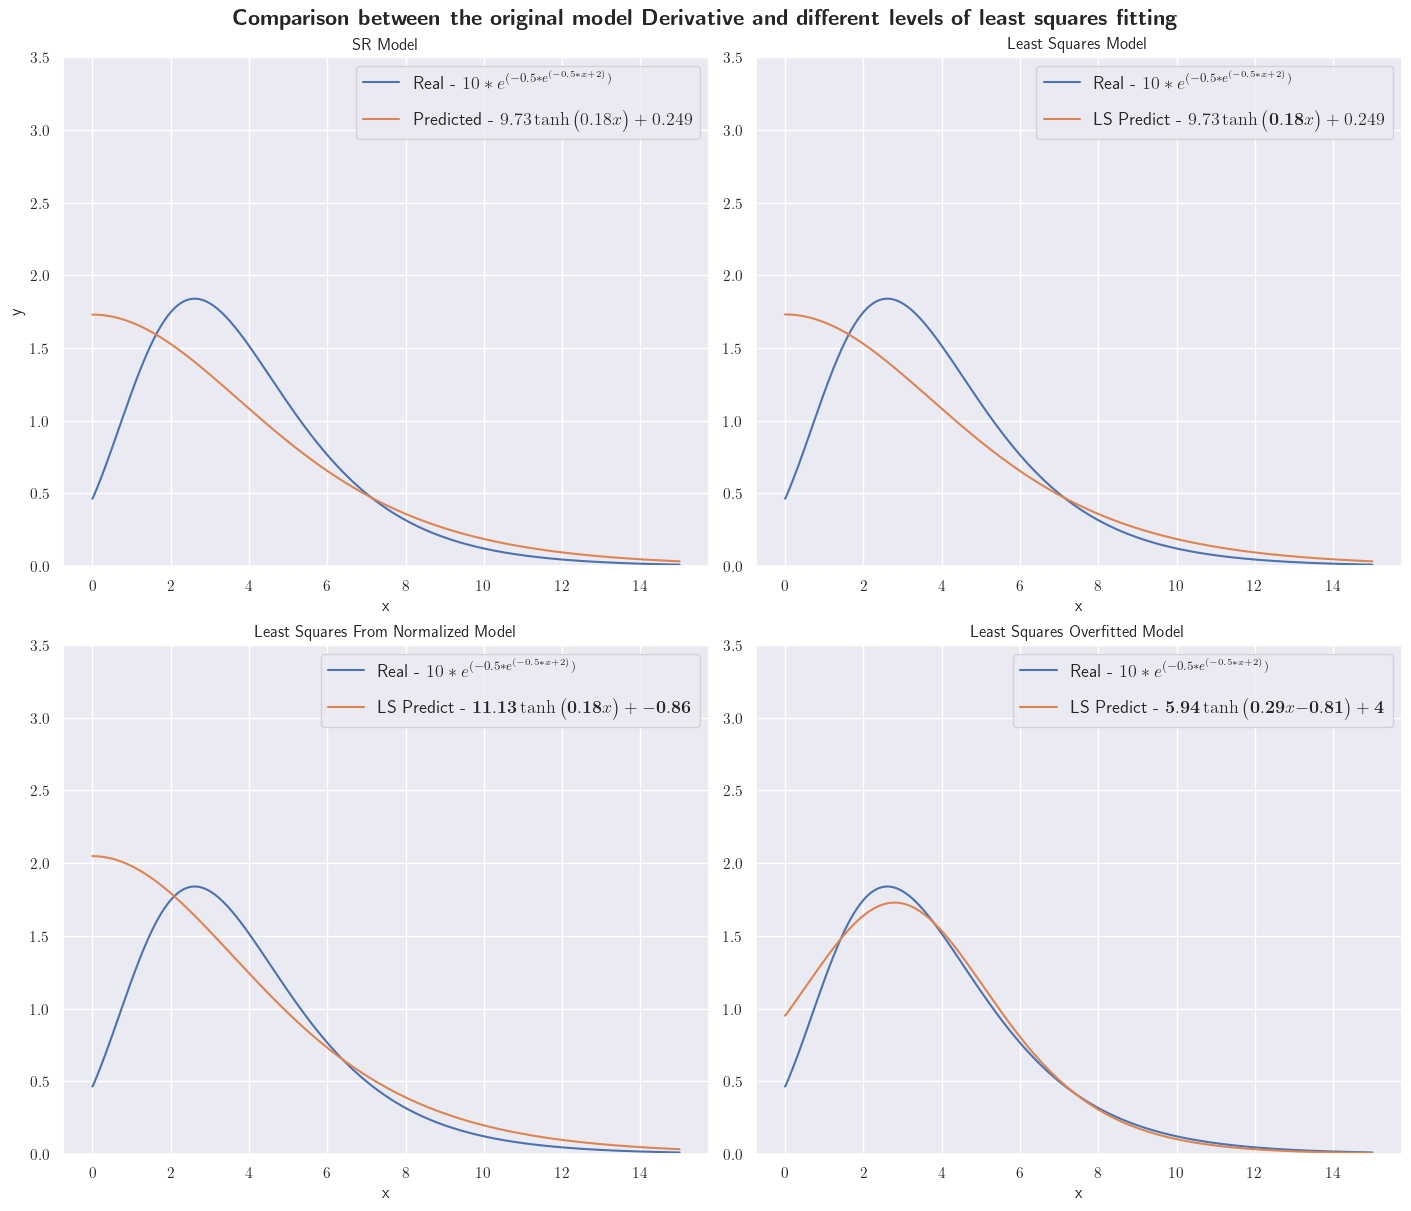

In [111]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(14, 12))
plt.setp(axs, ylim=(0, 3.5))


plt.suptitle(r"\textbf{Comparison between the original model Derivative and different levels of least squares fitting}", fontsize=16)

sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 0])
sns.lineplot(x=X, y=np.gradient(output_func(X), X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$", ax=axs[0, 0])


# Axis 1
axs[0, 0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {fitness_diff_score(X, func(X), best_data.y)}
Real Fitness Score: {least_squares_diff(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0, 0].legend(prop={"size": 13}, labelspacing=1)
axs[0, 0].set_ylabel("y")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 1])
sns.lineplot(x=X, y=np.gradient(model(X, *params), X), ax=axs[0, 1], label=r"LS Predict - $9.73\tanh\Big(\mathbf{0.18}x\Big) + 0.249$")
axs[0, 1].legend(prop={"size": 13}, labelspacing=1)
axs[0, 1].set_xlabel("x")

axs[0, 1].annotate(f"""Fitness Score: {least_squares_diff(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[0, 1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 0])
sns.lineplot(x=X, y=np.gradient(model_norm(X, *params_norm), X), ax=axs[1, 0], label=r"LS Predict - $\mathbf{11.13}\tanh\Big(\mathbf{0.18}x\Big) + \mathbf{-0.86}$")
axs[1, 0].legend(prop={"size": 13}, labelspacing=1)
axs[1, 0].set_xlabel("x")

axs[1, 0].annotate(f"""Fitness Score: {least_squares_diff(X, y, model_norm, *params_norm):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 0].set_title("Least Squares From Normalized Model")


# Axis 4
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 1])
sns.lineplot(x=X, y=np.gradient(model_over(X, *params_over), X), ax=axs[1, 1], label=r"LS Predict - $\mathbf{5.94}\tanh\Big(\mathbf{0.29}x \mathbf{- 0.81}\Big) + \mathbf{4}$")
axs[1, 1].legend(prop={"size": 13}, labelspacing=1)
axs[1, 1].set_xlabel("x")

axs[1, 1].annotate(f"""Fitness Score: {least_squares_diff(X, y, model_over, *params_over):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 1].set_title("Least Squares Overfitted Model")



plt.show()

# 🔵 Output Changing Constants Range

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (0, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Normalized input (range from 0 to 1)
- 🔴 Constants range from -10 to 10

In [114]:
path = "output_const_range/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

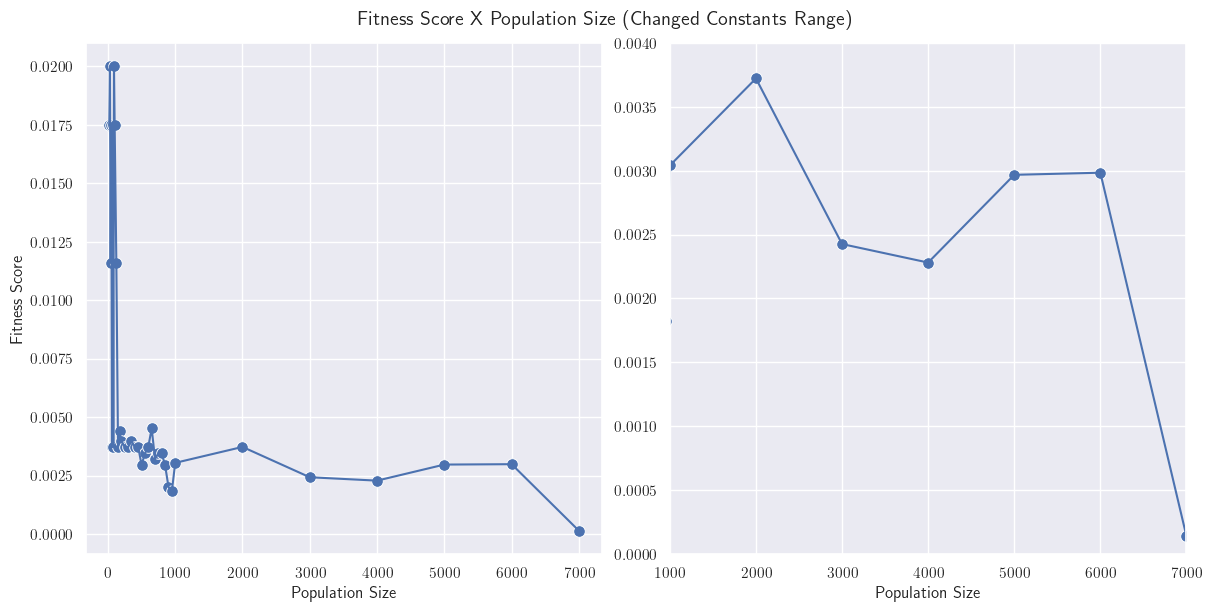

In [115]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Changed Constants Range)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0])
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((0, 0.0040))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

In [116]:
no_outlier_data = data.drop(32, axis=0)

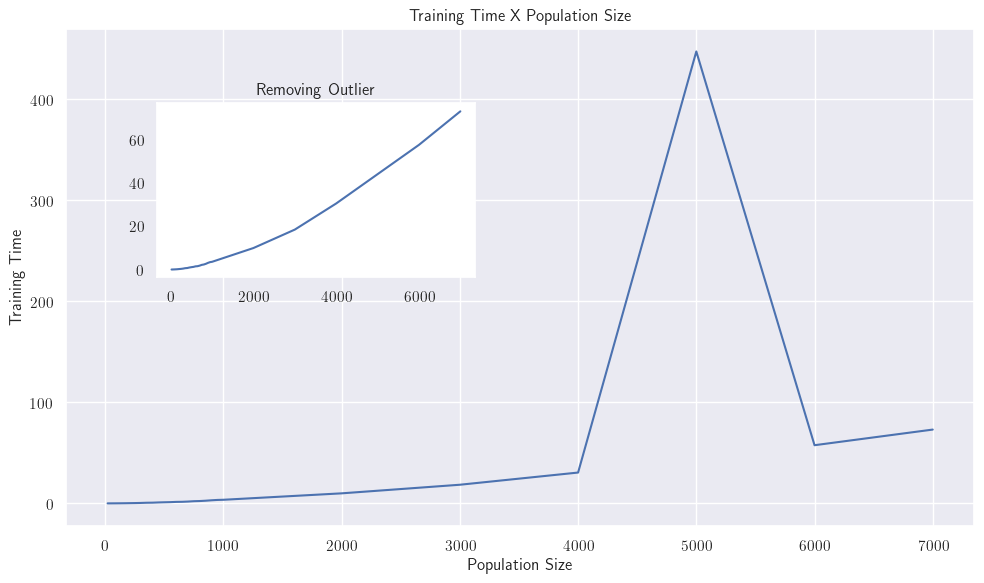

In [117]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

ins = plt.gca().inset_axes([0.1, 0.5, 0.35, 0.35])
ins.set_facecolor("white")
ins.set_ylabel(" ", visible=False)
ins.set_xlabel(" ", visible=False)
ins.set_title("Removing Outlier")

sns.set_style("white")
sns.lineplot(data, x=no_outlier_data.population_size, y=no_outlier_data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit
É a primeira vez que abaixamos uma ordem do erro real

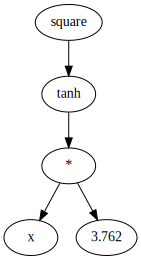

In [118]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [119]:
X = np.linspace(0, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    # return (np.tanh(3.762*X))**2
    return (np.tanh(3.762*(X - X.min())/(X_range)))**2 * y_range + y.min()

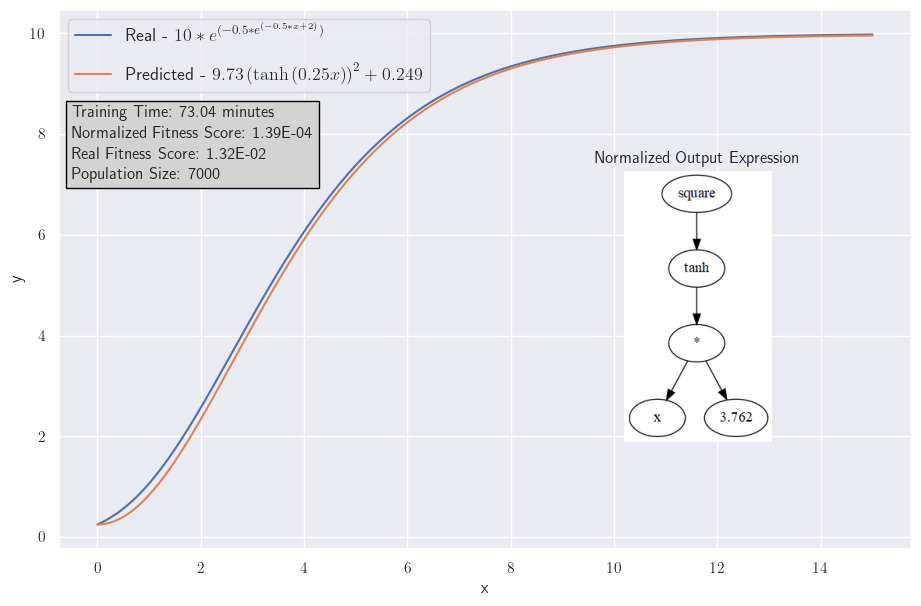

In [120]:
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\left(\tanh\left(0.25x\right)\right)^2 + 0.249$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-0.5, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.5, 0.2, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [121]:
def model(X, a):
    return 9.73*(np.tanh(a*X))**2 + 0.249

def model_norm(X, a, b, c):
    return a*(np.tanh(b*X))**2 + c

def model_over(X, a, b, c, d, e, f):
    return a*(b * np.tanh(c*X + d) + e)**2 + f


params = least_squares_fit(model, X, y, [1])
params_norm = least_squares_fit(model_norm, X, y, [1, 1, 1])
params_over = least_squares_fit(model_over, X, y, [1, 1, 1, 1, 1, 1])

print(params, params_norm, params_over, sep="\n")

[-0.25810246]
[9.55058082 0.25384252 0.43844541]
[ 1.37956513  2.28262819  0.25425682 -0.07690432  0.37971209  0.216474  ]


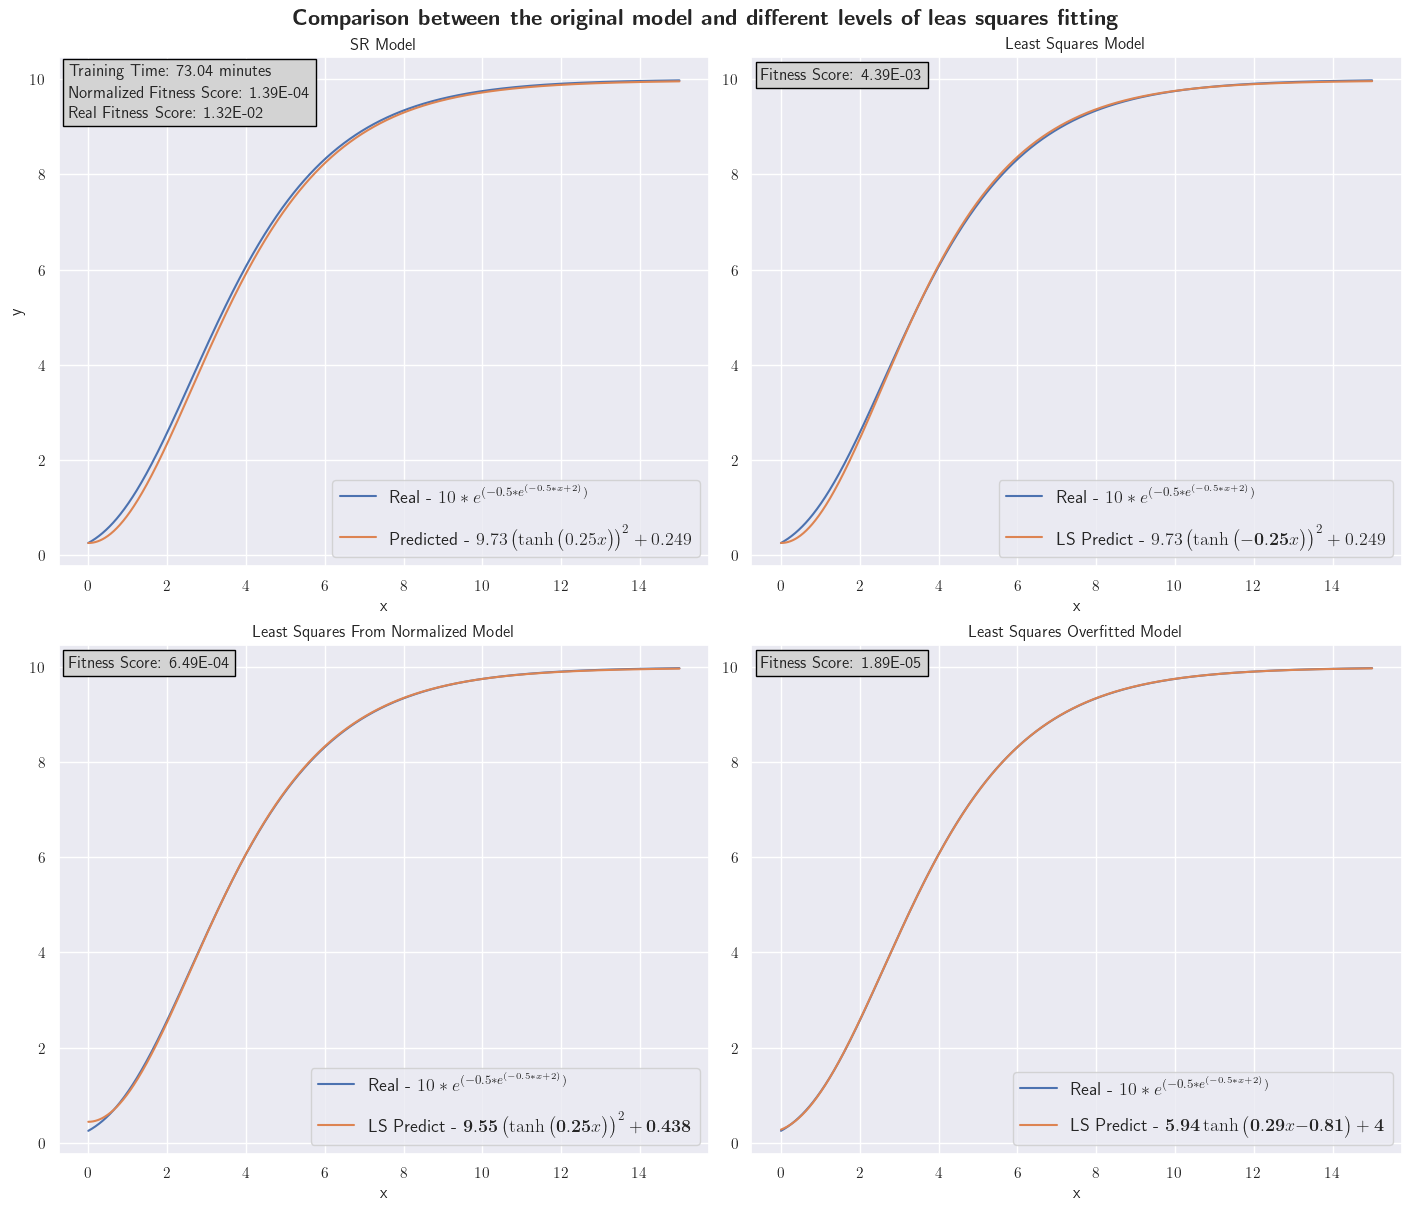

In [122]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(14, 12))

plt.suptitle(r"\textbf{Comparison between the original model and different levels of leas squares fitting}", fontsize=16)


# Axis 1
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\left(\tanh\Big(0.25x\Big)\right)^2 + 0.249$", ax=axs[0, 0])

axs[0, 0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0, 0].legend(prop={"size": 13}, labelspacing=1)
axs[0, 0].set_ylabel("y")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[0, 1], label=r"LS Predict - $9.73\left(\tanh\Big(\mathbf{-0.25}x\Big)\right)^2 + 0.249$")
axs[0, 1].legend(prop={"size": 13}, labelspacing=1)
axs[0, 1].set_xlabel("x")

axs[0, 1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[0, 1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 0])
sns.lineplot(x=X, y=model_norm(X, *params_norm), ax=axs[1, 0], label=r"LS Predict - $\mathbf{9.55}\left(\tanh\Big(\mathbf{0.25}x\Big)\right)^2 + \mathbf{0.438}$")
axs[1, 0].legend(prop={"size": 13}, labelspacing=1)
axs[1, 0].set_xlabel("x")

axs[1, 0].annotate(f"""Fitness Score: {least_squares(X, y, model_norm, *params_norm):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 0].set_title("Least Squares From Normalized Model")


# Axis 4
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 1])
sns.lineplot(x=X, y=model_over(X, *params_over), ax=axs[1, 1], label=r"LS Predict - $\mathbf{5.94}\tanh\Big(\mathbf{0.29}x \mathbf{- 0.81}\Big) + \mathbf{4}$")
axs[1, 1].legend(prop={"size": 13}, labelspacing=1)
axs[1, 1].set_xlabel("x")

axs[1, 1].annotate(f"""Fitness Score: {least_squares(X, y, model_over, *params_over):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 1].set_title("Least Squares Overfitted Model")



plt.show()

## 🔷 Teste da Derivada

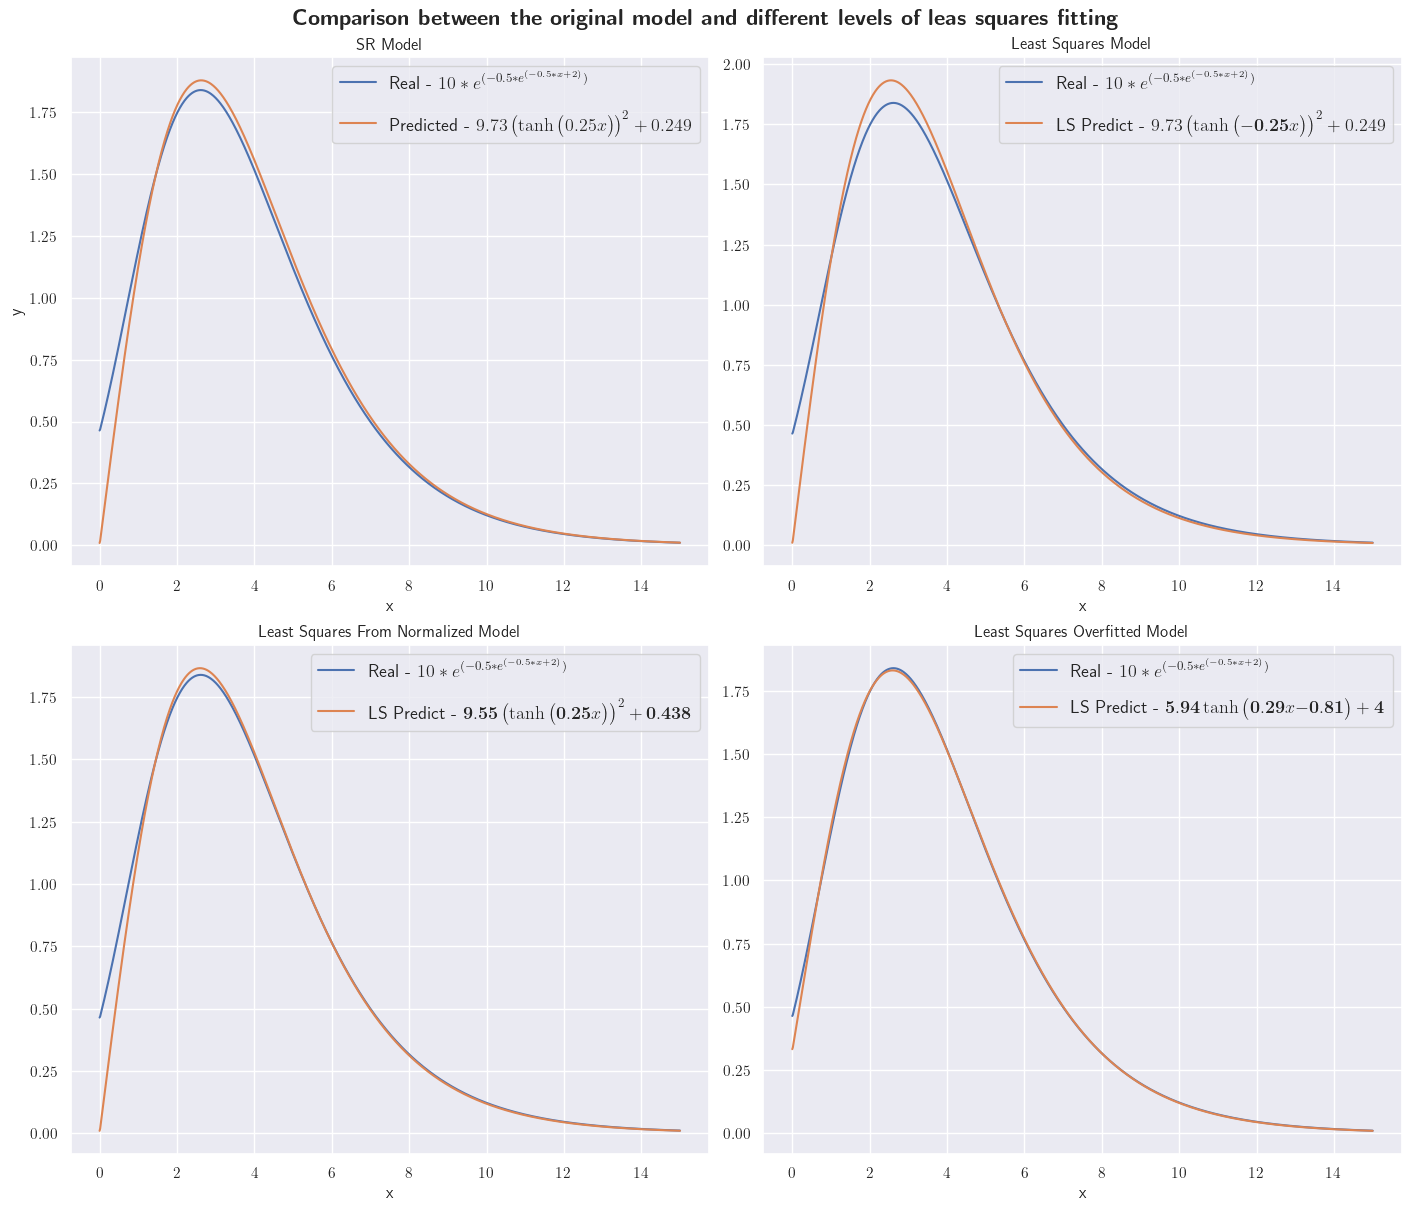

In [123]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(14, 12))

plt.suptitle(r"\textbf{Comparison between the original model and different levels of leas squares fitting}", fontsize=16)


# Axis 1
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 0])
sns.lineplot(x=X, y=np.gradient(output_func(X), X), label=r"Predicted - $9.73\left(\tanh\Big(0.25x\Big)\right)^2 + 0.249$", ax=axs[0, 0])

axs[0, 0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {fitness_diff_score(X, func(X), best_data.y)}
Real Fitness Score: {least_squares_diff(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0, 0].legend(prop={"size": 13}, labelspacing=1)
axs[0, 0].set_ylabel("y")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 1])
sns.lineplot(x=X, y=np.gradient(model(X, *params), X), ax=axs[0, 1], label=r"LS Predict - $9.73\left(\tanh\Big(\mathbf{-0.25}x\Big)\right)^2 + 0.249$")
axs[0, 1].legend(prop={"size": 13}, labelspacing=1)
axs[0, 1].set_xlabel("x")

axs[0, 1].annotate(f"""Fitness Score: {least_squares_diff(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[0, 1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 0])
sns.lineplot(x=X, y=np.gradient(model_norm(X, *params_norm), X), ax=axs[1, 0], label=r"LS Predict - $\mathbf{9.55}\left(\tanh\Big(\mathbf{0.25}x\Big)\right)^2 + \mathbf{0.438}$")
axs[1, 0].legend(prop={"size": 13}, labelspacing=1)
axs[1, 0].set_xlabel("x")

axs[1, 0].annotate(f"""Fitness Score: {least_squares_diff(X, y, model_norm, *params_norm):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 0].set_title("Least Squares From Normalized Model")


# Axis 4
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 1])
sns.lineplot(x=X, y=np.gradient(model_over(X, *params_over), X), ax=axs[1, 1], label=r"LS Predict - $\mathbf{5.94}\tanh\Big(\mathbf{0.29}x \mathbf{- 0.81}\Big) + \mathbf{4}$")
axs[1, 1].legend(prop={"size": 13}, labelspacing=1)
axs[1, 1].set_xlabel("x")

axs[1, 1].annotate(f"""Fitness Score: {least_squares_diff(X, y, model_over, *params_over):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 1].set_title("Least Squares Overfitted Model")



plt.show()

## 🔷 Conclusões
- Até adicionarmos mais uma dimensão nos parâmetros (caso 1,2 e 3), os parâmetros encontrados pelo modelo são muito semelhantes aqueles encontrados pelo mínimos quadrados
    - Ao adicionar mais uma dimensão o método de mínimos quadrados muda todos os parâmetros originais (overfitting?). 

# 🔵 Output Intensified
Nos casos "intensificados", aumentamos o intervalo dos dados, afim de mostrar melhor o comportamento da função.

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- 🔴 X range: (-5, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Non Normalized input
- 🔴 Constants range from -10 to 10

In [124]:
path = "output_intensified/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size
Os resultados para o intervalo "intensificado" e não normalizado foram horríveis

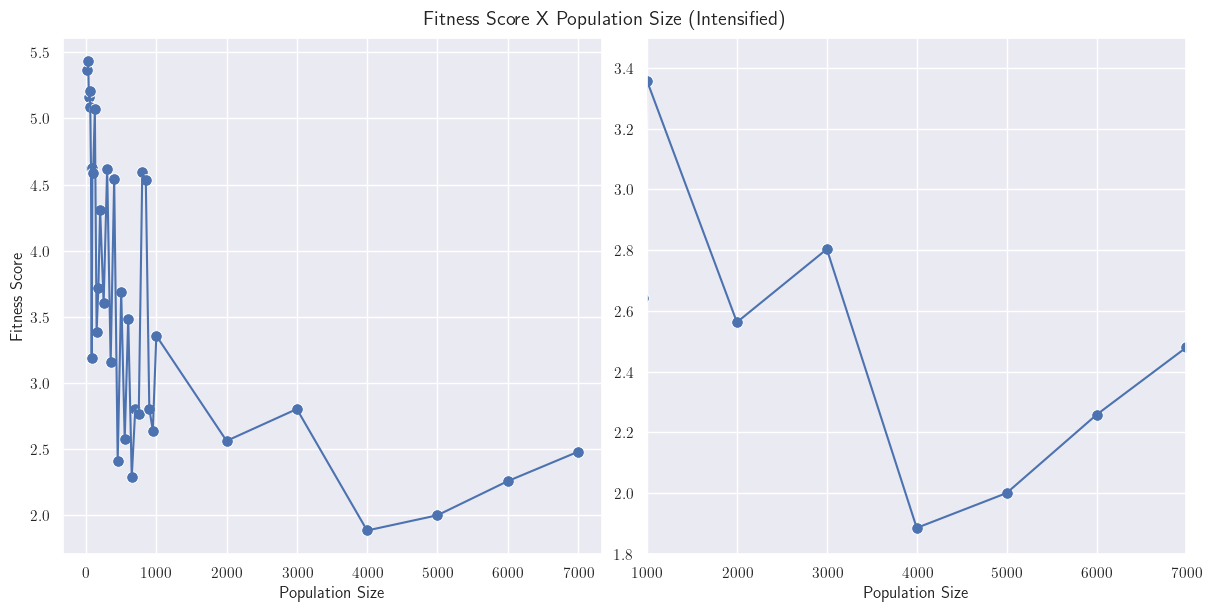

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Intensified)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((1.8, 3.5))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

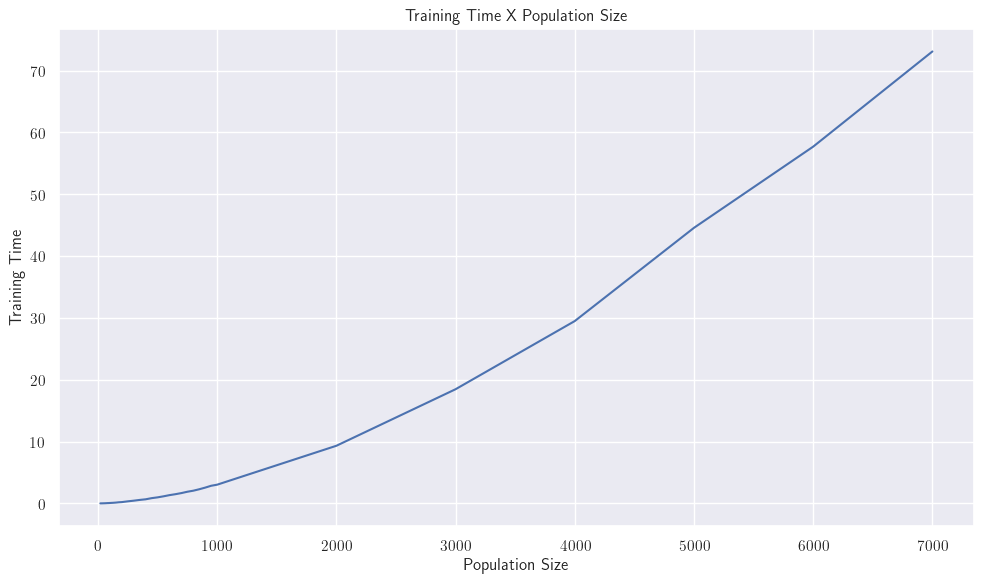

In [126]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

sns.set_style("white")
sns.lineplot(data, x=data.population_size, y=data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

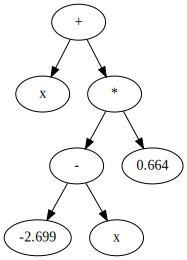

In [127]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [128]:
X = best_data.x
y = func(X)

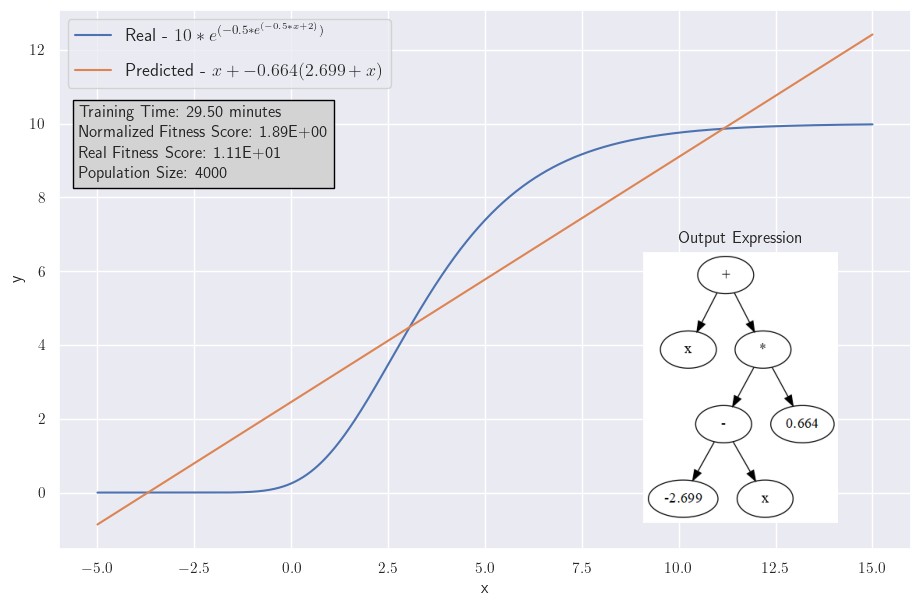

In [129]:
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=best_data.x, y=func(best_data.x), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=best_data.x, y=best_data.y, label=r"Predicted - $x+-0.664(2.699 + x)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-5.48, 8.5), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.55, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [130]:
def model(X, a, b):
    return a * X + b

params = least_squares_fit(model, X, y, [1, 1])
params

array([0.68943329, 2.17017923])

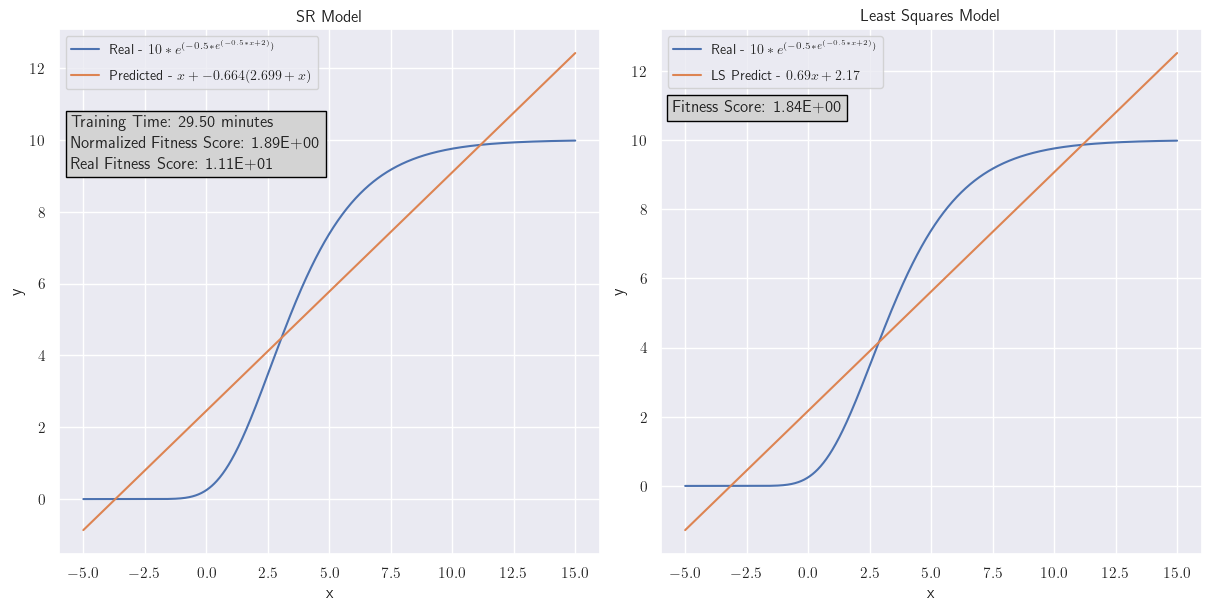

In [131]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=best_data.y, label=r"Predicted - $x+-0.664(2.699 + x)$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-5.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $0.69x + 2.17$")
axs[1].legend(prop={"size": 10}, labelspacing=1)
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-5.5, 10.8), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

plt.show()

# 🔵 Output Normalized Intensified 

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- 🔴 X range: (-5, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Normalized input (range from 0 to 1)
- 🔴 Constants range from -10 to 10

In [13]:
path = "../algorithms/Outputs/output_inten_scaled/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

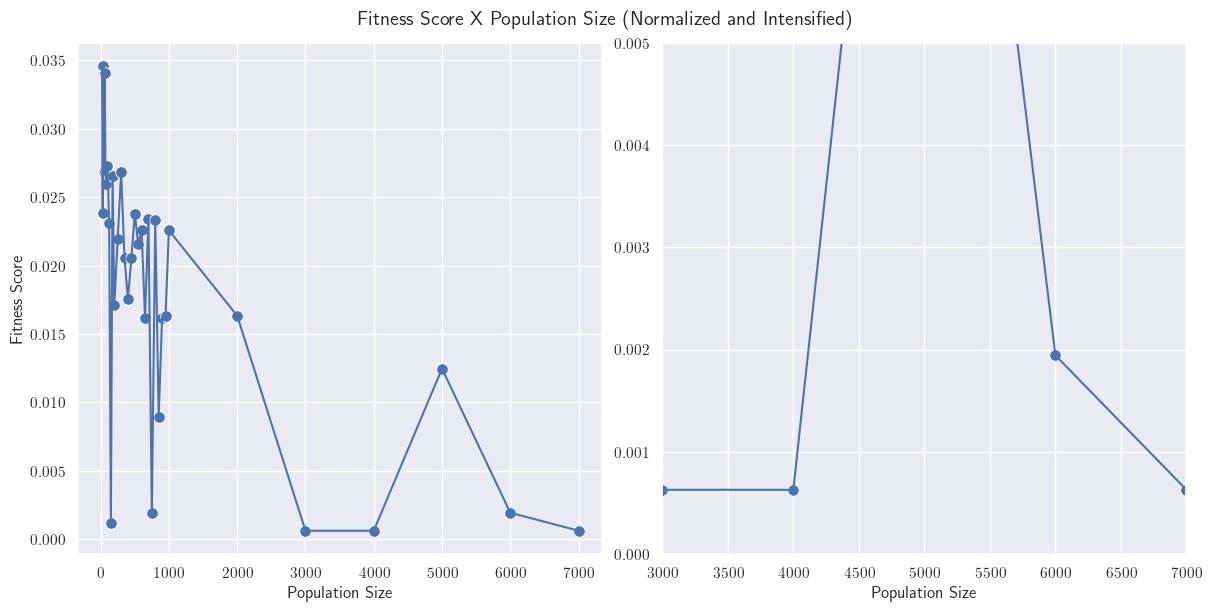

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Normalized and Intensified)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)

for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim(3000, 7000)
axs[1].set_ylim((0, 0.0050))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

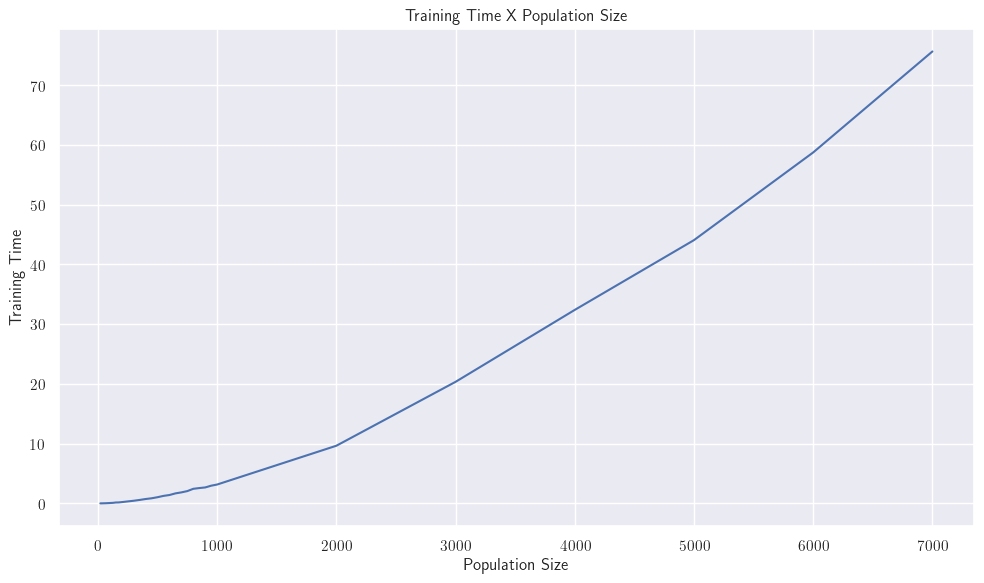

In [37]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

sns.set_style("white")
sns.lineplot(data, x=data.population_size, y=data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

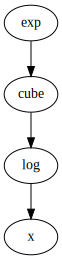

In [38]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [39]:
X = np.linspace(-5, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    # return (np.tanh(3.762*(X - X.min())/(X_range)))**2 * y_range + y.min()
    return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()

$$9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$$

C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()


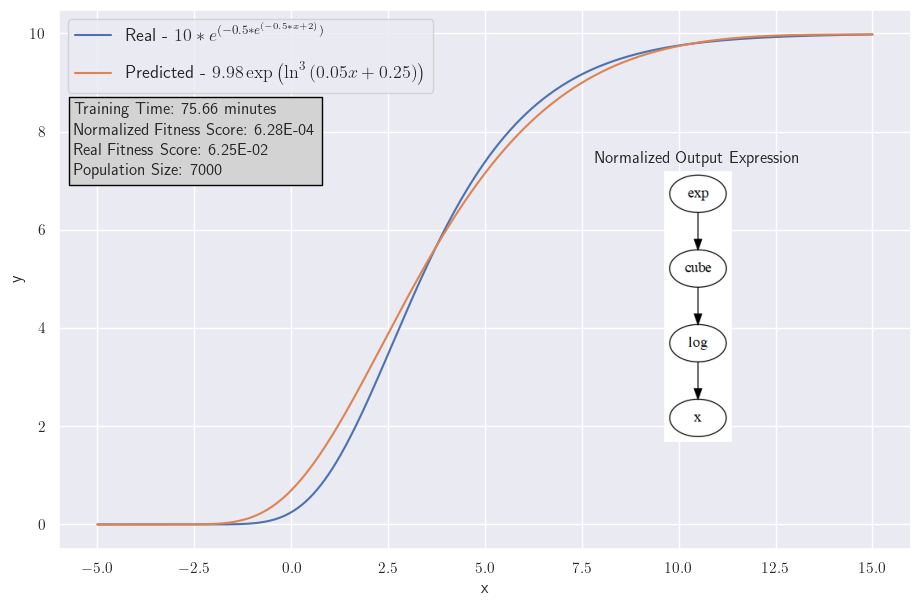

In [40]:
plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-5.6, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.5, 0.2, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [34]:
def model(X, a):
    return 9.98*np.exp((np.log(a*X + 0.25))**3)

def model_norm(X, a, b, c):
    return a*np.exp((np.log(b*X + c))**3)

def model_over(X, a, b, c, d, e):
    return a*np.exp(d*(np.log(c*X) +e)**3 ) + b 

# this problem is too hard for least squares, normalizing for it to be able to solve
scaler = MinMaxScaler((0,1))
X_scaled = scaler.fit_transform(np.c_[X]).reshape(1000, )
y_scaled = scaler.fit_transform(np.c_[y]).reshape(1000, )

params = least_squares_fit(model, X_scaled, y_scaled, [1])
params_norm = least_squares_fit(model_norm, X_scaled, y_scaled, [1, 1, 1])
params_over = least_squares_fit(model_over, X_scaled, y_scaled, [1, 1, 1, 1, 1])

def model(X, a):
    return (9.98 * np.exp((np.log(a*(X - X.min())/(X_range)) + 0.25)**3))*y_range + y.min()

def model_norm(X, a, b, c):
    return (a * np.exp((np.log(b*(X - X.min())/(X_range)) + c)**3))*y_range + y.min()

def model_over(X, a, b, c, d, e):
    return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()

print(params, params_norm, params_over, sep="\n")

[0.00939093]
[1.27517354e-12 1.46196254e+00 1.91323881e+01]
[ 0.99073414 -0.00250642  0.34961345  1.77810566  1.19440164]


C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\1933048336.py:2: RuntimeWarning: invalid value encountered in log
  return 9.98*np.exp((np.log(a*X + 0.25))**3)
C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\1933048336.py:8: RuntimeWarning: divide by zero encountered in log
  return a*np.exp(d*(np.log(c*X) +e)**3 ) + b
C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\1933048336.py:8: RuntimeWarning: invalid value encountered in log
  return a*np.exp(d*(np.log(c*X) +e)**3 ) + b


In [35]:
params_over[2]*X.min()/X_range

-0.08740336290482698

C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\1933048336.py:20: RuntimeWarning: divide by zero encountered in log
  return (9.98 * np.exp((np.log(a*(X - X.min())/(X_range)) + 0.25)**3))*y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\1933048336.py:20: RuntimeWarning: divide by zero encountered in log
  return (9.98 * np.exp((np.log(a*(X - X.min())/(X_range)) + 0.25)**3))*y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\1933048336.py:23: RuntimeWarning: divide by zero encountered in log
  return (a * np.exp((np.log(b*(X - X.min())/(X_range)) + c)**3))*y_range + y.min()
C:\Us

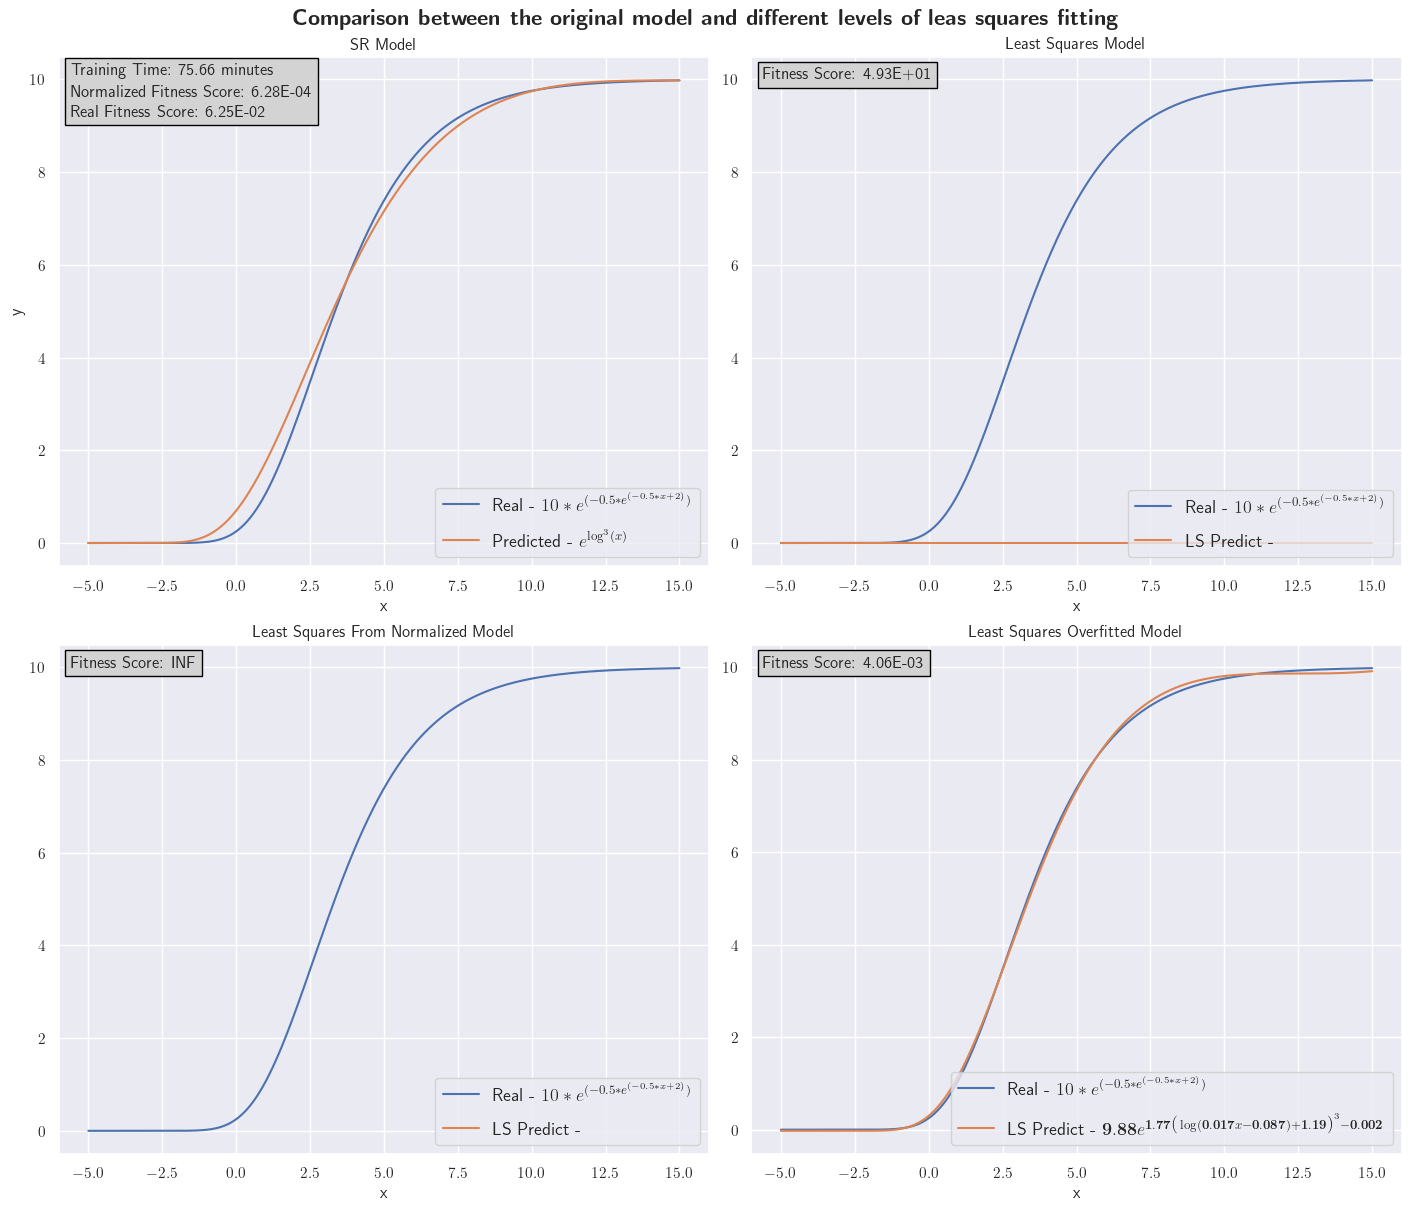

In [36]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(14, 12))

plt.suptitle(r"\textbf{Comparison between the original model and different levels of leas squares fitting}", fontsize=16)


# Axis 1
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $e^{\log^3(x)}$", ax=axs[0, 0])

axs[0, 0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-5.6, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0, 0].legend(prop={"size": 13}, labelspacing=1, loc="lower right")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[0, 1], label=r"LS Predict -")
axs[0, 1].legend(prop={"size": 13}, labelspacing=1, loc="lower right")
axs[0, 1].set_xlabel("x")

axs[0, 1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-5.6, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[0, 1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 0])
sns.lineplot(x=X, y=model_norm(X, *params_norm), ax=axs[1, 0], label=r"LS Predict - ")
axs[1, 0].legend(prop={"size": 13}, labelspacing=1, loc="lower right")
axs[1, 0].set_xlabel("x")

axs[1, 0].annotate(f"""Fitness Score: {least_squares(X, y, model_norm, *params_norm):.2E}""", 
            (-5.6, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 0].set_title("Least Squares From Normalized Model")


# Axis 4
# X = np.linspace(-15, 30, 1000)
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 1])
sns.lineplot(x=X, y=model_over(X, *params_over), ax=axs[1, 1], label=r"LS Predict - $\mathbf{9.88}e^{\mathbf{1.77}\big(\log(\mathbf{0.017}x \mathbf{-0.087}) + \mathbf{1.19}\big)^3 \mathbf{-0.002}}$")
axs[1, 1].legend(prop={"size": 13}, labelspacing=1, loc="lower right")
axs[1, 1].set_xlabel("x")

axs[1, 1].annotate(f"""Fitness Score: {least_squares(X, y, model_over, *params_over):.2E}""", 
            (-5.6, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 1].set_title("Least Squares Overfitted Model")



plt.show()

## 🔷 Teste da Derivada

C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\1933048336.py:20: RuntimeWarning: divide by zero encountered in log
  return (9.98 * np.exp((np.log(a*(X - X.min())/(X_range)) + 0.25)**3))*y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\1933048336.py:20: RuntimeWarning: divide by zero encountered in log
  return (9.98 * np.exp((np.log(a*(X - X.min())/(X_range)) + 0.25)**3))*y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\1933048336.py:23: RuntimeWarning: divide by zero encountered in log
  return (a * np.exp((np.log(b*(X - X.min())/(X_range)) + c)**3))*y_range + y.min()


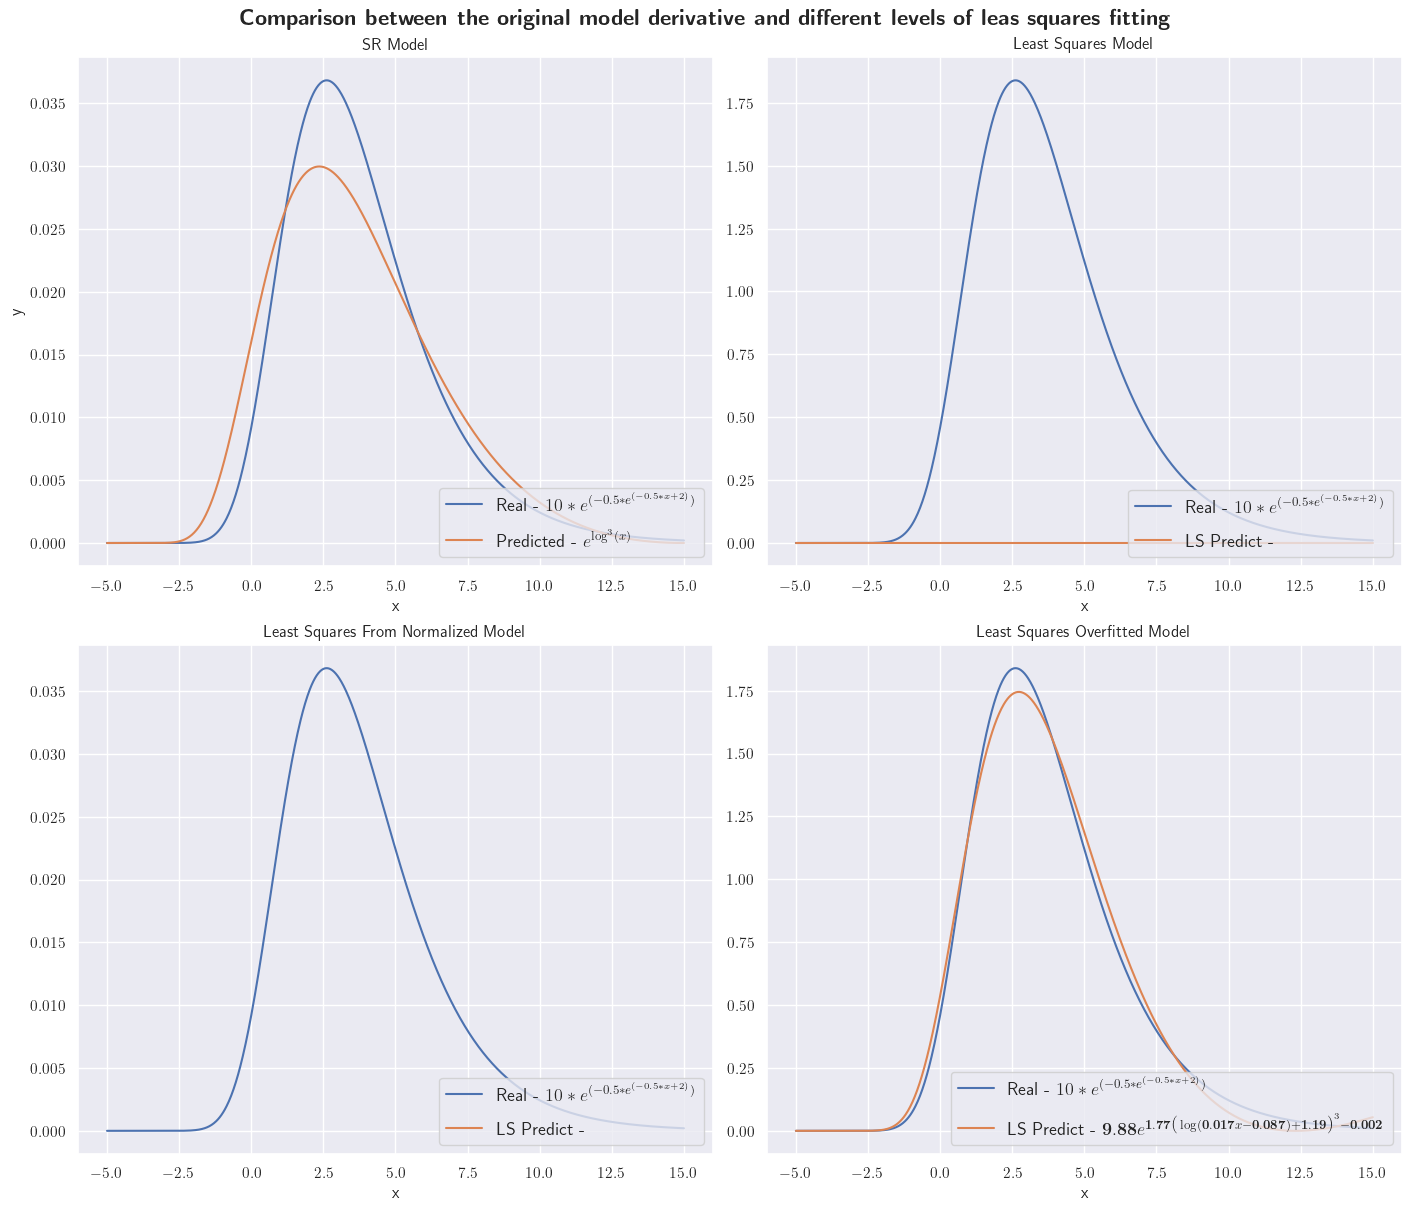

In [143]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(14, 12))

plt.suptitle(r"\textbf{Comparison between the original model derivative and different levels of leas squares fitting}", fontsize=16)


# Axis 1
sns.lineplot(x=X, y=np.gradient(func(X)), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 0])
sns.lineplot(x=X, y=np.gradient(output_func(X)), label=r"Predicted - $e^{\log^3(x)}$", ax=axs[0, 0])

axs[0, 0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {fitness_diff_score(X, func(X), best_data.y):.2E}
Real Fitness Score: {least_squares_diff(X, y, output_func):.2E}""", 
            (-5.6, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0, 0].legend(prop={"size": 13}, labelspacing=1, loc="lower right")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 1])
sns.lineplot(x=X, y=np.gradient(model(X, *params), X), ax=axs[0, 1], label=r"LS Predict -")
axs[0, 1].legend(prop={"size": 13}, labelspacing=1, loc="lower right")
axs[0, 1].set_xlabel("x")

axs[0, 1].annotate(f"""Fitness Score: {least_squares_diff(X, y, model, *params):.2E}""", 
            (-5.6, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[0, 1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=np.gradient(func(X)), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 0])
sns.lineplot(x=X, y=np.gradient(model_norm(X, *params_norm), X), ax=axs[1, 0], label=r"LS Predict - ")
axs[1, 0].legend(prop={"size": 13}, labelspacing=1, loc="lower right")
axs[1, 0].set_xlabel("x")

axs[1, 0].annotate(f"""Fitness Score: {least_squares_diff(X, y, model_norm, *params_norm):.2E}""", 
            (-5.6, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 0].set_title("Least Squares From Normalized Model")


# Axis 4
sns.lineplot(x=X, y=np.gradient(func(X), X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 1])
sns.lineplot(x=X, y=np.gradient(model_over(X, *params_over), X), ax=axs[1, 1], label=r"LS Predict - $\mathbf{9.88}e^{\mathbf{1.77}\big(\log(\mathbf{0.017}x \mathbf{-0.087}) + \mathbf{1.19}\big)^3 \mathbf{-0.002}}$")
axs[1, 1].legend(prop={"size": 13}, labelspacing=1, loc="lower right")
axs[1, 1].set_xlabel("x")

axs[1, 1].annotate(f"""Fitness Score: {least_squares_diff(X, y, model_over, *params_over):.2E}""", 
            (-5.6, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 1].set_title("Least Squares Overfitted Model")



plt.show()

# Considerações

- O modelos se saiu melhor (no que diz respeito a encontrar parâmetros) para o caso normalizado, em que pouco, ou nenhum, parâmetro precisa ser encontrado.
- Os resultados para o caso sem normalizar (em que é necessário encontrar os verdadeiros parâmetros) o algoritmo não convergiu.
- 🔴 Teria alguma transformação que eu possa aplicar que transforme os coeficientes da função original em 1? Assim poderiamos testar o quão bem o modelo encontra a forma da solução, sem o problema dos coeficientes. 

Encontra soluções bom bons parâmetros, no espaço normalizado, onde ele não precisa adicionar os parâmetros na árvore. Mas são bem próximo dos melhores parâmetros. 

# 🔵 Output Changing Generations 

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (-5, 15)

- 🔴 Population size = 2000
- max_expression_size: 3
- max_island_count: population/10

- Normalized input (range from 0 to 1)
- Constants range from -10 to 10

In [47]:
path = "../algorithms/Outputs/output_generations/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness Score X Max Generations

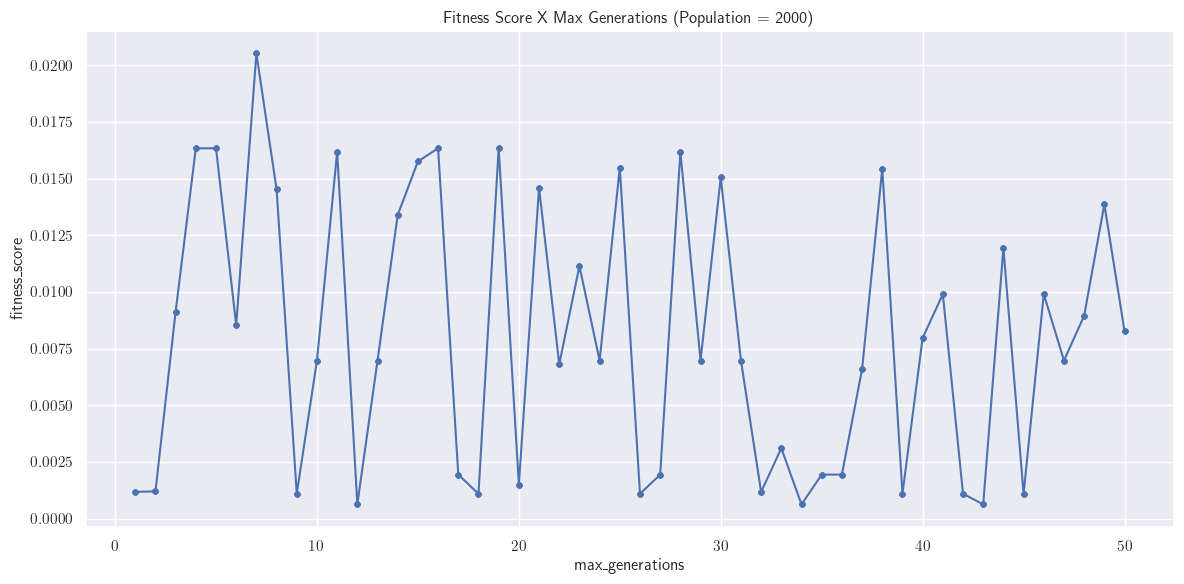

In [48]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

plt.figure(figsize=(12, 6))

sns.lineplot(data, x=data.max_generations, y=data["fitness_score"]) 
sns.scatterplot(data, x=data.max_generations, y=data["fitness_score"], s=30)

plt.title("Fitness Score X Max Generations (Population = 2000)")
plt.tight_layout()
plt.show()

## Training Time X Max Generation

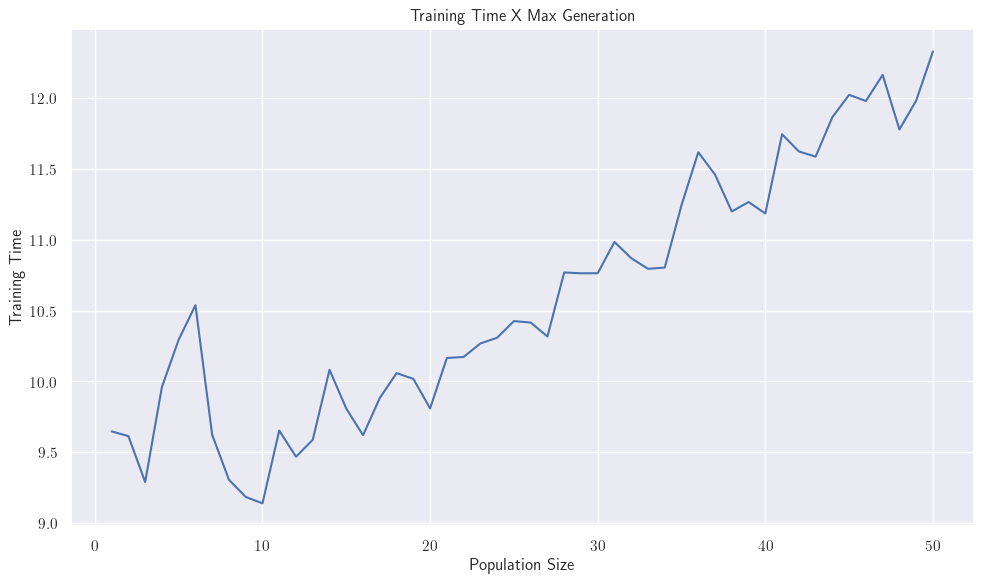

In [49]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Max Generation ")

sns.lineplot(data, x=data.max_generations, y=data["training_time"]) 

sns.set_style("white")
sns.lineplot(data, x=data.max_generations, y=data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

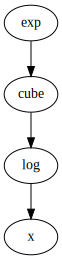

In [50]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.max_generations[0])


img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [51]:
X = np.linspace(-5, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    # return (np.tanh(3.762*(X - X.min())/(X_range)))**2 * y_range + y.min()
    return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()

$$9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$$

C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_1416\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()


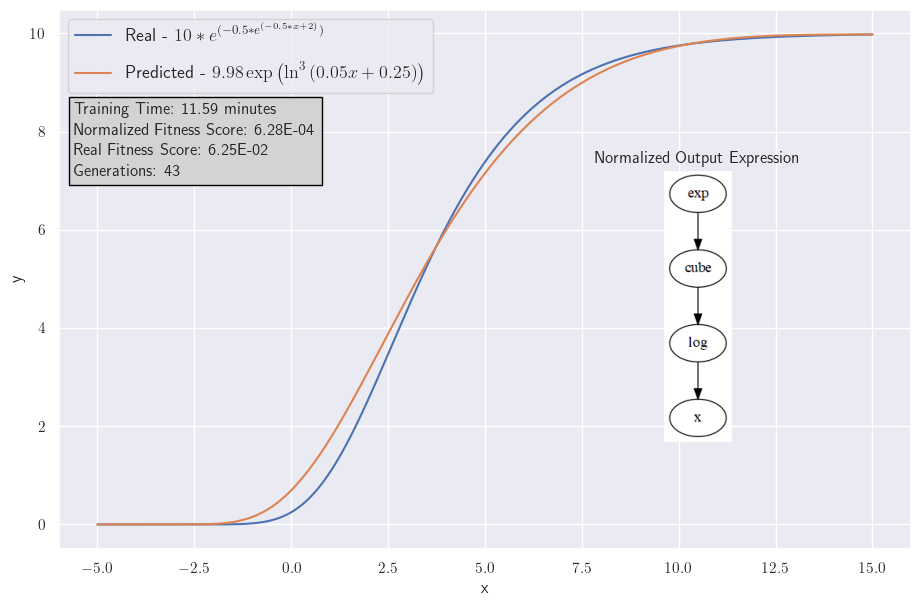

In [52]:
plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Generations: {best_index}""", 
            (-5.6, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.5, 0.2, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [53]:
def model(X, a, b, c, d, e):
    return a*np.exp(d*(np.log(c*X) +e)**3 ) + b 

scaler = MinMaxScaler((0,1))
X_scaled = scaler.fit_transform(np.c_[X]).reshape(1000, )
y_scaled = scaler.fit_transform(np.c_[y]).reshape(1000, )

params = least_squares_fit(model, X_scaled, y_scaled, [1, 1, 1, 1, 1])
params

C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\1098609051.py:2: RuntimeWarning: divide by zero encountered in log
  return a*np.exp(d*(np.log(c*X) +e)**3 ) + b
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\1098609051.py:2: RuntimeWarning: invalid value encountered in log
  return a*np.exp(d*(np.log(c*X) +e)**3 ) + b


array([ 0.99073414, -0.00250642,  0.34961345,  1.77810566,  1.19440164])

$$0.99e^{1.78\big(\ln(0.35x) + 1.19\big)^3} - 0.0025$$

In [54]:
def model(X, a, b, c, d, e):
    return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()

C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\2754879685.py:2: RuntimeWarning: divide by zero encountered in log
  return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\2754879685.py:2: RuntimeWarning: divide by zero encountered in log
  return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_18112\2754879685.py:2: RuntimeWarning: divide by zero encountered in log
  return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range +

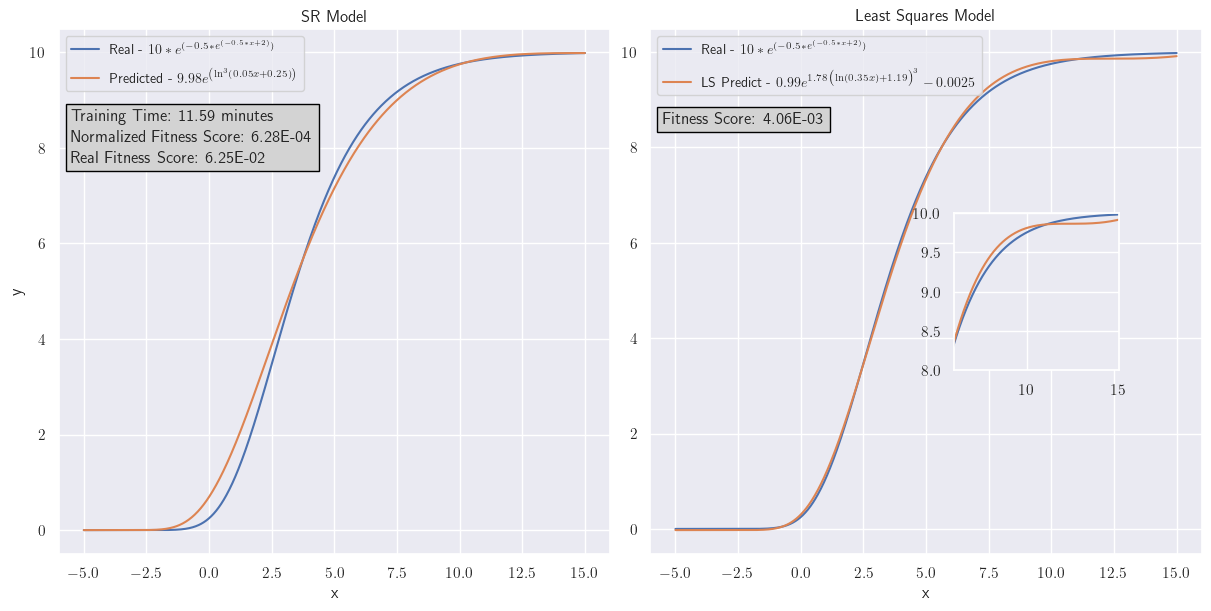

In [55]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.98e^{\left(\ln^3\left(0.05x + 0.25\right)\right)}$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-5.5, 7.7), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $0.99e^{1.78\big(\ln(0.35x) + 1.19\big)^3} - 0.0025$")
axs[1].legend(prop={"size": 10}, labelspacing=1, loc = "upper left")
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-5.5, 8.5), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

ins = axs[1].inset_axes([0.55, 0.35, 0.30, 0.30])
sns.lineplot(x=X, y=func(X), ax=ins)
sns.lineplot(x=X, y=model(X, *params), ax=ins)
ins.set_xlim((6,15))
ins.set_ylim((8,10))

plt.show()

## 🔷 Conclusões
- Talvez por deixar um número menor para a população, o algoritmo não estabilizou
- A complexidade ainda é exponencial, mas ainda com muita variação. Possivelmente devido a instabilidade do modelo para uma população de 2000
- Algumas curvas ganham um "pontos" a mais na fitness, por descreverem o comportamento assintótico de forma correta
- Obtemos a mesma solução do caso anterior para população = 7000
- O aumento do número de gerações não parece fazer o algoritmo atingir um ponto de equilíbrio
- Um problema que pode ter atrapalhado o algoritmo é a má fomulação da função de mutação (resolvido após os testes)

Essa conclusão é interessante, mesmo com o algoritimo não atingindo um ponto de equilíbrio, a mesma solução que para o caso de equilíbrio foi encontrada. Talvez por sorte?

# 🔵 Output Changing Expression Sizes

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (-5, 15)

- 🔴 Population size = 500 ou 2000
- 🔴 gerações: 20
- max_island_count: population/10

- Normalized input (range from 0 to 1)
- Constants range from -10 to 10

In [55]:
path = "../algorithms/Outputs/output_expr_size/"

data1 = pd.read_csv(path + "test1/" + cleaned_results)
data2 = pd.read_csv(path + "test2/" + cleaned_results) 
data3 = pd.read_csv(path + "test3/" + cleaned_results) 

img_path = [path + f"test{i}/" + "trees/" for i in range(1,4)]
data_path = [path + f"test{i}/" + "data/" for i in range(1,4)]

## Fitness Score X Expression Size
Sem querer rodei o mesmo algoritmo duas vezes, devia ter mudado um parâmetro mas esqueci. Mas isso pode ser interessante para comparar diferentes runs aleatórias

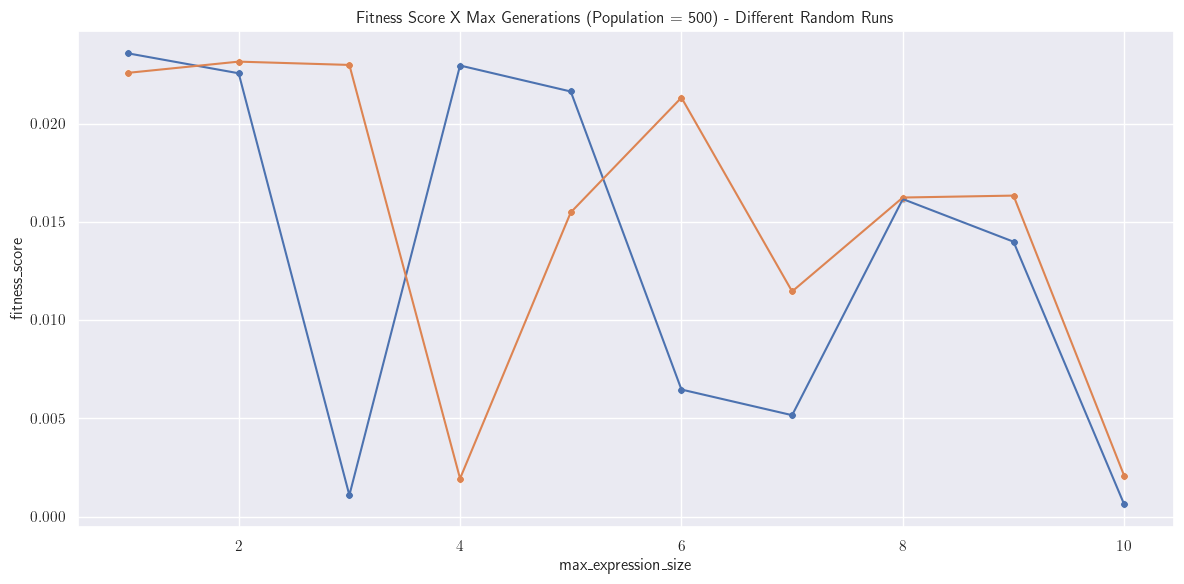

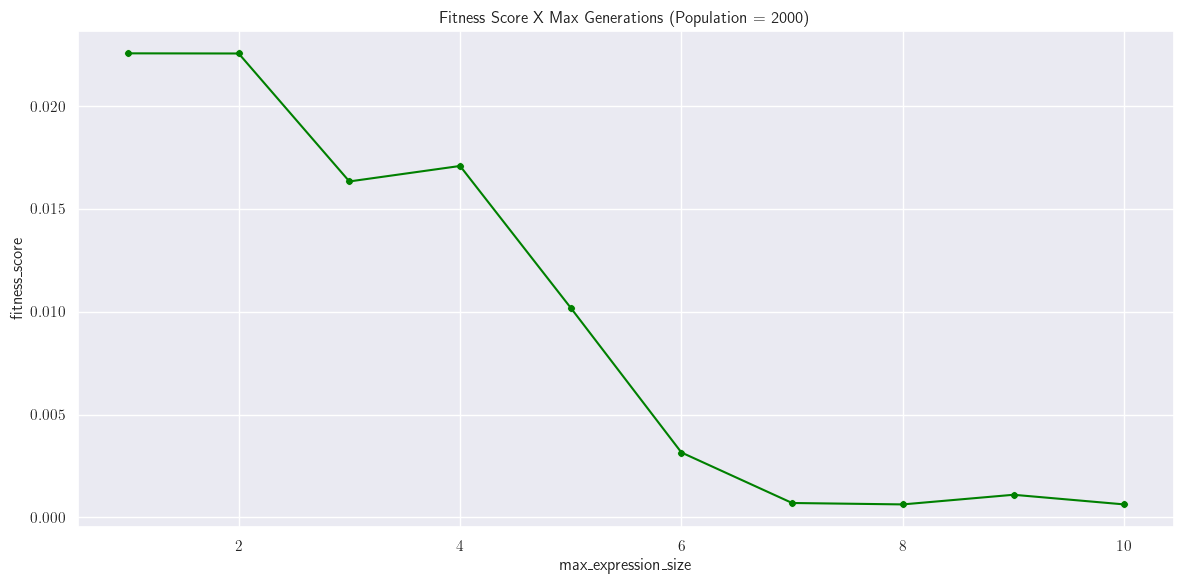

In [56]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

plt.figure(figsize=(12, 6))

sns.lineplot(data1, x=data1.max_expression_size, y=data1["fitness_score"]) 
sns.scatterplot(data1, x=data1.max_expression_size, y=data1["fitness_score"], s=30)


sns.lineplot(data2, x=data2.max_expression_size, y=data2["fitness_score"]) 
sns.scatterplot(data2, x=data2.max_expression_size, y=data2["fitness_score"], s=30)


plt.title("Fitness Score X Max Generations (Population = 500) - Different Random Runs")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(data3, x=data3.max_expression_size, y=data3["fitness_score"], c="green") 
sns.scatterplot(data3, x=data3.max_expression_size, y=data3["fitness_score"], s=30, c="green")


plt.title("Fitness Score X Max Generations (Population = 2000)")
plt.tight_layout()
plt.show()


## Training Time X Max Generation

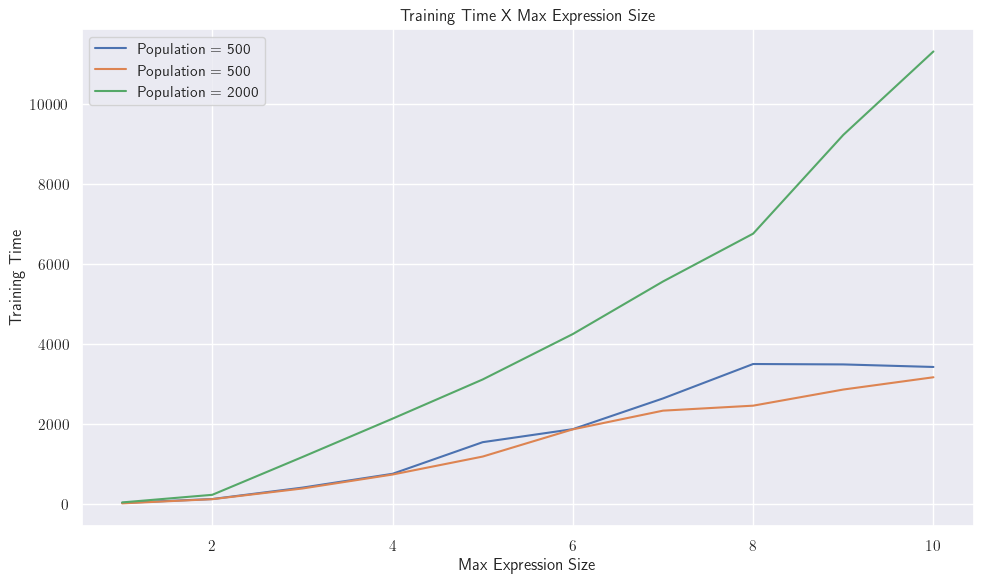

In [59]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Max Expression Size")

sns.lineplot(data1, x=data1.max_expression_size, y=data1["training_time"]*60, label="Population = 500") 
sns.lineplot(data2, x=data2.max_expression_size, y=data2["training_time"]*60, label="Population = 500") 
sns.lineplot(data3, x=data3.max_expression_size, y=data3["training_time"]*60, label="Population = 2000") 

plt.tight_layout()
plt.xlabel("Max Expression Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

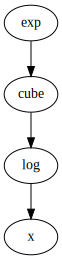

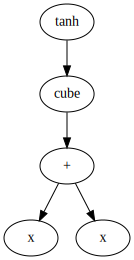

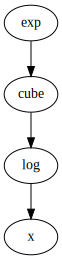

In [58]:
img_path = []
best_data = []

for i, data in enumerate([data1, data2, data3]):
    best_tree = data.sort_values("fitness_score", axis=0)
    best_tree = best_tree.reset_index(drop=True)
    best_index = str(best_tree.max_expression_size[0])
    
    img_path.append(path + f"test{i+1}/" + "trees/tree-" + best_index)

    best_data.append(pd.read_csv(path + f"test{i+1}/" +  f"data/data-{best_index}.csv"))
    display(SVG(img_path[i] + ".svg"))

# 🔵 Conclusões 
- Novamento observamos grande variação para o caso com baixa população
- Demora muito mais, quando se aumenta o número de expressões
- As mesmas soluções que os dois casos anteriores foram encontradas
    - Isso mostra que o tamanho das expressões não teve grande unfluência em uma melhora no algoritmo
    
Nesse caso em específico, uma expresão maior pode gerar diretamento (se tivermos sorte) a expressão correta

# 🟢 Conclusões Finais

## 🔷 Problemas na Formulação
- Esqueci de definir uma seed
- Problema com a função de mutação

## 🔷 Conclusões Gerais
1. O algoritmo possui complexidade exponencial, com respeito ao tamanho da população

2. Um comportamento observado em todos os casos é que o modelo atinge um estado de equilíbrio com um número maior de população. Mesmo que tenhamos observados resultados melhores, e mais consistentes, quando maior o número de iterações. 
    - Quanto maior a população mais estável é o algoritmo e também mais chance de obter um resultado "difícil"
    
3. Como é esperado de um modelo de aprendizado de máquina, o correto ajusto dos hiperparâmetros são fundamentais para encontrar um bom resultado.
    - Nesse modelo, os principais hiperparâmetros são: População, intervalo das constantes, número de gerações, tamanho da expressão
        - O tamanho da expressão, em especial, aumenta muito a complexidade do algoritmo, sem aparentes grandes melhoras no resultado final
    
4. O aumento do número de gerações não parece fazer o algoritmo atingir um ponto de equilíbrio
    - Entretanto ele faz o algoritmo obter solução mais especializadas (focar melhor no mínimo local) 
    
5. O intervalo forncecido para os dados é de fundamental importância para o modelo encontrar uma solução geral. 
    - Daí vem a ideia do Feynman AI, que busca expandir os dados originais fornecidos, utilizando uma rede neural (aproximador universal), para assim obter mais informações e conseguir obeter um melhor resulado do comportamento da função, mesmo em pontos que não foram fornecidos.
    - Além disso, fornecer pontos nos quais o comportamento mais marcante da curva é presente é de fundamental importância. (não adianta mostrar a parte que a curva é assintótica).
    
6. A má otimização de constantes pode ter sido muito marcante nesse problema, uma vez que a solução é muito específica (duas exponenciais encadeadas cujo os 2 coeficientes devem ser número negativos).

## 🔷 Possíveis Melhorias

1. 🔴 **Otimização de Consntates**: Parece ser a melhoria mais importante. Ao realizar uma otimização de mínimos quadrados obtemos, em todos os casos que o algoritmo convergiu, resultados melhores. Além de que, uma melhor otimização de constantes pode levar o algoritmo a evoluir de forma mais apropriada e atingir solução que ele antes não atingiria. 
2. **Melhorar a função de mutação**: No caso das soluções com $\tanh$ o algoritmo não conseguiu adicionar um constante a $\tanh$, mesmo que isso levaria a um melhor resultado. Isso pode ser causado pela fato de que, no momento, a função de mutação não era capaz realizar esse tipo de mutação na raiz de uma árvore. Isso pode ter causado a população a ser tomada pela solução de $\tanh$, porém sem conseguir melhora-la de forma eficiente.
- A função mutação já foi modificada e está em fase de testes